# Funding in startups

Here the objective is to analyze data in order to summarize its main characteristics, to better understand the data set, to discover relationships between different variables and to extract important variables for the problem we are trying to solve.

**Objective**<br>

The objective of the project is to predict whether a startup that is currently operating will become a success or a failure. The success of a company is defined as the event that provides the founders of the company with a large sum of money through the M&A (Merger and Acquisition) process or an IPO (Initial Public Offering). A company would be considered a failure if it had to close.

In this case I will not go as far as the modeling stage but I do plan to go through all the steps leading up to an EDA and get to `Data Preparation`.

I will have to answer the following questions:

* How many new companies fail?
* How many start-ups succeed?
* Reasons for failure
* How to avoid failure
* And many other questions...

### Loading the data and perform EDA

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="Paired", font="sans-serif", font_scale=1, color_codes=True)
import warnings
import plotly.express as px
import plotly.graph_objects as go
!pip install squarify
import squarify
!pip install gdown
import gdown
warnings.filterwarnings("ignore")

In [ ]:
file_id = "110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP"  # File ID for the specific file
url = f"https://drive.google.com/uc?id=110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP"
output = "investments_VC.csv"  # Name of the saved file
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=110tJaSocsCTvgqjJ3LyfzZOmhy8woTfP
To: /content/investments_VC.csv
100%|██████████| 12.5M/12.5M [00:00<00:00, 82.4MB/s]


'investments_VC.csv'

In [ ]:
data = pd.read_csv(output, encoding='unicode_escape')

In [ ]:
# Getting first 5 rows of the data
data.head()

permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   funding_total_usd      status country_code state_code         region  ...  \
0          17,50,000    acquired          USA         NY  New York City  ...   
1          40,00,000   operating          USA         CA    Los Angeles  ...   
2             40,000   operating          EST        NaN        Tallinn  ...   
3          15,00,000   operating          GBR        NaN         London  ...   
4             60,000   operating          USA         TX         Dallas  ...   

  secondary_market  product_crowdfunding round_A round_B round_C  round_D  \
0              0.0                   0.0     0.0     0.0     0.0      0.0   
1              0.0                   0.0     0.0     0.0     0.0      0.0   
2              0.0                   0.0     0.0     0.0     0.0      0.0   
3              0.0                   0.0     0.0     0.0     0.0      0.0   
4              0.0                   0.0     0.0     0.0     0.0      0.0   

  round_E round_F  round_G  round_H  
0     0.0     0.0      0.0      0.0  
1     0.0     0.0      0.0      0.0  
2     0.0     0.0      0.0      0.0  
3     0.0     0.0      0.0      0.0  
4     0.0     0.0      0.0      0.0  

[5 rows x 39 columns]

In [ ]:
# Getting last 5 rows of the data
data.tail()

permalink name homepage_url category_list  market   funding_total_usd   \
54289       NaN  NaN          NaN           NaN      NaN                 NaN   
54290       NaN  NaN          NaN           NaN      NaN                 NaN   
54291       NaN  NaN          NaN           NaN      NaN                 NaN   
54292       NaN  NaN          NaN           NaN      NaN                 NaN   
54293       NaN  NaN          NaN           NaN      NaN                 NaN   

      status country_code state_code region  ... secondary_market  \
54289    NaN          NaN        NaN    NaN  ...              NaN   
54290    NaN          NaN        NaN    NaN  ...              NaN   
54291    NaN          NaN        NaN    NaN  ...              NaN   
54292    NaN          NaN        NaN    NaN  ...              NaN   
54293    NaN          NaN        NaN    NaN  ...              NaN   

       product_crowdfunding round_A round_B round_C  round_D round_E round_F  \
54289                   NaN     NaN     NaN     NaN      NaN     NaN     NaN   
54290                   NaN     NaN     NaN     NaN      NaN     NaN     NaN   
54291                   NaN     NaN     NaN     NaN      NaN     NaN     NaN   
54292                   NaN     NaN     NaN     NaN      NaN     NaN     NaN   
54293                   NaN     NaN     NaN     NaN      NaN     NaN     NaN   

       round_G  round_H  
54289      NaN      NaN  
54290      NaN      NaN  
54291      NaN      NaN  
54292      NaN      NaN  
54293      NaN      NaN  

[5 rows x 39 columns]

In [ ]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [ ]:
data = data.drop(['permalink','homepage_url'],axis=1)
data.columns = ['name','category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

In [ ]:
# Converting founded_year column to numeric data type
data['founded_year'] = pd.to_numeric(data['founded_year'], errors='coerce')

In [ ]:
# Data types of all the attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   category_list         45477 non-null  object 
 2   market                45470 non-null  object 
 3   funding_total_usd     49438 non-null  object 
 4   status                48124 non-null  object 
 5   country_code          44165 non-null  object 
 6   state_code            30161 non-null  object 
 7   region                44165 non-null  object 
 8   city                  43322 non-null  object 
 9   funding_rounds        49438 non-null  float64
 10  founded_at            38554 non-null  object 
 11  founded_month         38482 non-null  object 
 12  founded_quarter       38482 non-null  object 
 13  founded_year          38482 non-null  float64
 14  first_funding_at      49438 non-null  object 
 15  last_funding_at    

name                     4857
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E   

<Axes: >

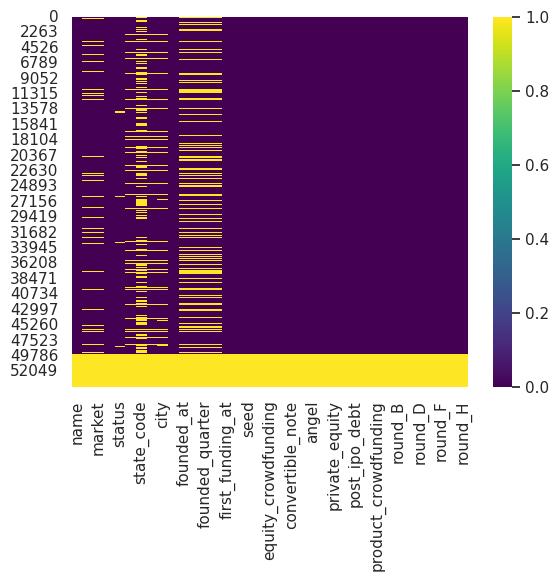

In [ ]:
# Check for missing values in each column
print(data.isnull().sum())
sns.heatmap(data.isnull(),cmap="viridis")

In [ ]:
# Observations on shape of data
data.shape

(54294, 37)

In [ ]:
# Changing funding_total_usd column's datatype to numeric datatype
data["funding_total_usd"] = data["funding_total_usd"].astype(str).apply(lambda x: x.replace(',',''))
data["funding_total_usd"] = data["funding_total_usd"].astype(str).apply(lambda x: x.replace(' ',''))
data["funding_total_usd"] = data["funding_total_usd"].astype(str).apply(lambda x: x.replace('-',''))
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
data["funding_total_usd"].head()

0    1750000.0
1    4000000.0
2      40000.0
3    1500000.0
4      60000.0
Name: funding_total_usd, dtype: float64

#### One Hot Encoding and classify by status class
Let's create a column that classifies startups depending on whether they succeeded, failed or are still operating.
As well as apply One Hot Encoding to transform categorical variables in number values

In [ ]:
status = []

for i in data['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')

data['status_class'] = status

In [ ]:
status_class = pd.get_dummies(data['status_class'])
data = pd.concat([data,status_class],axis=1)
data.head()

name                                      category_list  \
0            #waywire         |Entertainment|Politics|Social Media|News|   
1  &TV Communications                                            |Games|   
2   'Rock' Your Paper                             |Publishing|Education|   
3   (In)Touch Network  |Electronics|Guides|Coffee|Restaurants|Music|i...   
4  -R- Ranch and Mine                      |Tourism|Entertainment|Games|   

          market  funding_total_usd     status country_code state_code  \
0          News           1750000.0   acquired          USA         NY   
1         Games           4000000.0  operating          USA         CA   
2    Publishing             40000.0  operating          EST        NaN   
3   Electronics           1500000.0  operating          GBR        NaN   
4       Tourism             60000.0  operating          USA         TX   

          region         city  funding_rounds  ... round_C round_D round_E  \
0  New York City     New York             1.0  ...     0.0     0.0     0.0   
1    Los Angeles  Los Angeles             2.0  ...     0.0     0.0     0.0   
2        Tallinn      Tallinn             1.0  ...     0.0     0.0     0.0   
3         London       London             1.0  ...     0.0     0.0     0.0   
4         Dallas   Fort Worth             2.0  ...     0.0     0.0     0.0   

   round_F round_G round_H  status_class   fail  operating  success  
0      0.0     0.0     0.0       success  False      False     True  
1      0.0     0.0     0.0     operating  False       True    False  
2      0.0     0.0     0.0     operating  False       True    False  
3      0.0     0.0     0.0     operating  False       True    False  
4      0.0     0.0     0.0     operating  False       True    False  

[5 rows x 41 columns]

In [ ]:
data.head()

name                                      category_list  \
0            #waywire         |Entertainment|Politics|Social Media|News|   
1  &TV Communications                                            |Games|   
2   'Rock' Your Paper                             |Publishing|Education|   
3   (In)Touch Network  |Electronics|Guides|Coffee|Restaurants|Music|i...   
4  -R- Ranch and Mine                      |Tourism|Entertainment|Games|   

          market  funding_total_usd     status country_code state_code  \
0          News           1750000.0   acquired          USA         NY   
1         Games           4000000.0  operating          USA         CA   
2    Publishing             40000.0  operating          EST        NaN   
3   Electronics           1500000.0  operating          GBR        NaN   
4       Tourism             60000.0  operating          USA         TX   

          region         city  funding_rounds  ... round_C round_D round_E  \
0  New York City     New York             1.0  ...     0.0     0.0     0.0   
1    Los Angeles  Los Angeles             2.0  ...     0.0     0.0     0.0   
2        Tallinn      Tallinn             1.0  ...     0.0     0.0     0.0   
3         London       London             1.0  ...     0.0     0.0     0.0   
4         Dallas   Fort Worth             2.0  ...     0.0     0.0     0.0   

   round_F round_G round_H  status_class   fail  operating  success  
0      0.0     0.0     0.0       success  False      False     True  
1      0.0     0.0     0.0     operating  False       True    False  
2      0.0     0.0     0.0     operating  False       True    False  
3      0.0     0.0     0.0     operating  False       True    False  
4      0.0     0.0     0.0     operating  False       True    False  

[5 rows x 41 columns]

In [ ]:
data_new = data.dropna()
fig=px.scatter_3d(data_new,x='funding_total_usd',y='market',z='region',color='status',size='funding_rounds',hover_data=['name'])
fig.show()

Majority of the startups are Operating, some of them are closed, while just a few of them are acquired.

Text(0.5, 1.0, 'Top 20 countries with most Startups')

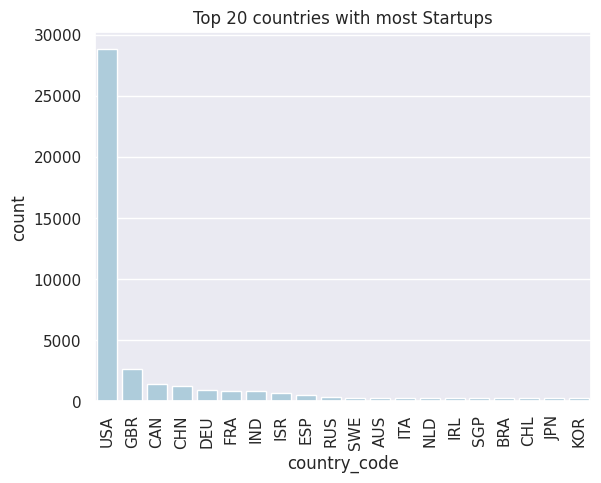

In [ ]:
sns.countplot(data = data,x="country_code",order=data["country_code"].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title("Top 20 countries with most Startups")

-US has the highest number of startups, followed by Great Britain, Canada, China, and Germany. This suggests a strong entrepreneurial ecosystem, abundant investment opportunities, and a favorable regulatory environment in these countries.

Text(0.5, 1.0, 'Top 20 States with most Startups')

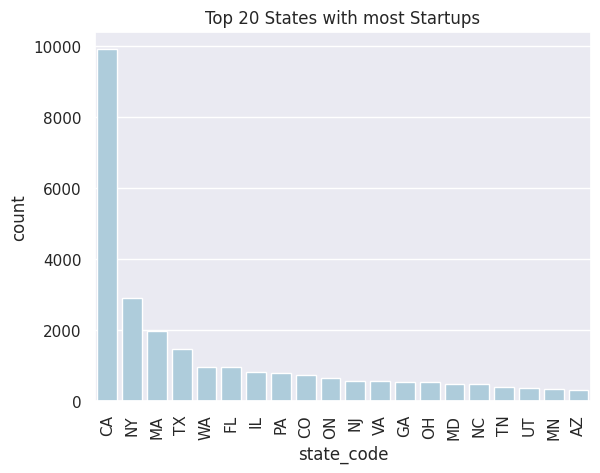

In [ ]:
sns.countplot(data = data,x="state_code",order=data["state_code"].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title("Top 20 States with most Startups")


- California has the highest number of startups, followed by New York, Massachusetts, Texas, and Washington.
- This suggests a strong entrepreneurial ecosystem, abundant investment opportunities, and a favorable regulatory environment in these states.
- Most of the top states belong to the United States. This highlights the spread of entrepreneurship across the United States.

Text(0.5, 1.0, 'Top 20 Regions with most Startups')

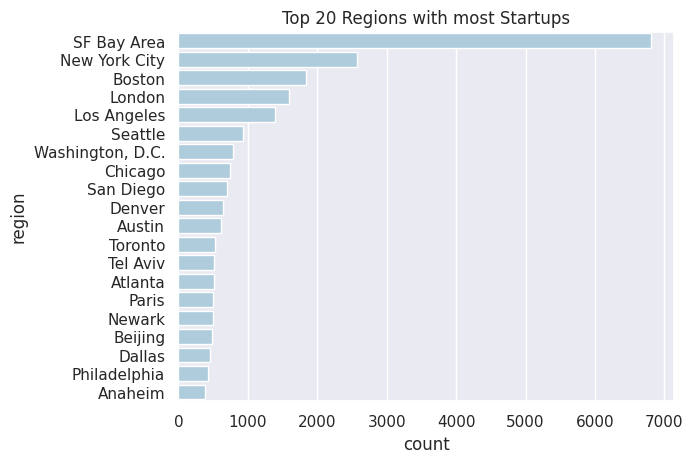

In [ ]:
sns.countplot(data = data,y="region",order=data["region"].value_counts()[:20].index)
plt.title("Top 20 Regions with most Startups")


- SF Bay Area has the highest number of startups, followed by New York City, Boston, London, and Los Angeles.
- This suggests factors like a strong venture capital presence, a highly skilled workforce, and a vibrant tech culture.
- The graph showcases a diverse range of regions with varying levels of startup activity. This diversity reflects the spread of entrepreneurship across different geographical locations and economic contexts.

Text(0.5, 1.0, 'Top 20 cities with most Startups')

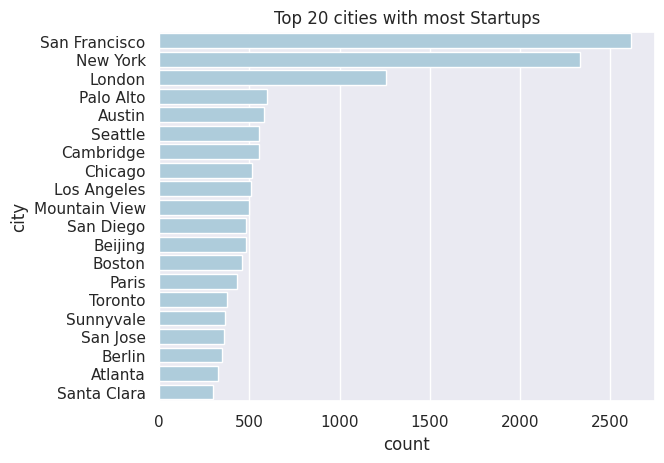

In [ ]:
sns.countplot(data = data,y="city",order=data["city"].value_counts()[:20].index)
plt.title("Top 20 cities with most Startups")


- San Francisco had majority of startups, followed by New York, London, Palo Alto and Austin.
- This infers factors like a strong venture capital presence, a highly skilled workforce, and a vibrant tech culture in these cities.
- The graph reveals regional clusters of startup activity. The San Francisco Bay Area (San Francisco, Palo Alto, Mountain View, Sunnyvale, San Jose, Santa Clara) is particularly prominent, suggesting that this region offers favorable conditions for startup growth.

Text(0.5, 1.0, 'Top 20 markets with most Startups')

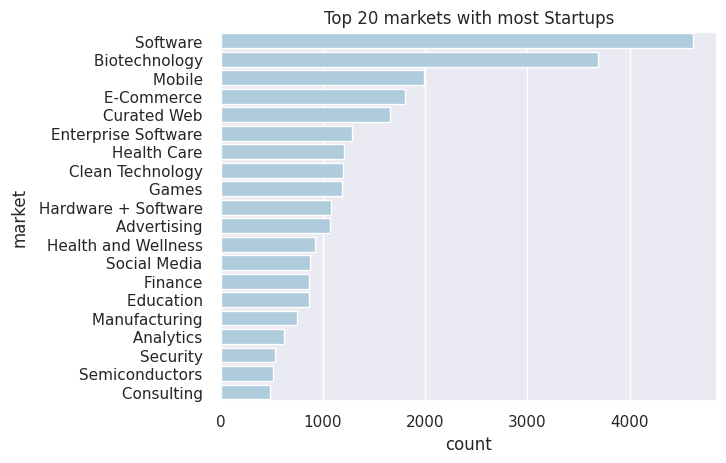

In [ ]:
sns.countplot(data = data,y="market",order=data["market"].value_counts()[:20].index)
plt.title("Top 20 markets with most Startups")

- Software is by far the most prominent market for startups, followed by Biotechnology, Mobile, E-commerce & Curated Web.
- The presence of markets like Clean Technology, Health & Wellness, and Analytics suggests a growing focus on sustainability, healthcare, and data-driven solutions.

Text(0.5, 1.0, 'Top 20 categories with most Startups')

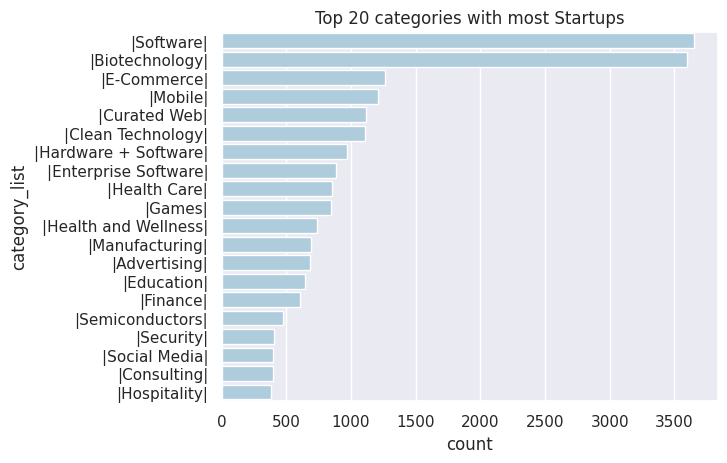

In [ ]:
sns.countplot(data = data,y="category_list",order=data["category_list"].value_counts()[:20].index)
plt.title("Top 20 categories with most Startups")

- Software is by far the most prominent category for startups, followed by Biotechnology, E-commerce, Mobile, & Curated Web.
- The presence of markets like Clean Technology, Health & Wellness, and Analytics suggests a growing focus on sustainability, healthcare, and data-driven solutions.

In [ ]:
data.describe()

funding_total_usd  funding_rounds  founded_year          seed  \
count       4.090700e+04    49438.000000  38482.000000  4.943800e+04   
mean        1.591253e+07        1.696205   2007.359129  2.173215e+05   
std         1.686788e+08        1.294213      7.579203  1.056985e+06   
min         1.000000e+00        1.000000   1902.000000  0.000000e+00   
25%         3.500000e+05        1.000000   2006.000000  0.000000e+00   
50%         2.000000e+06        1.000000   2010.000000  0.000000e+00   
75%         1.000000e+07        2.000000   2012.000000  2.500000e+04   
max         3.007950e+10       18.000000   2014.000000  1.300000e+08   

            venture  equity_crowdfunding   undisclosed  convertible_note  \
count  4.943800e+04         4.943800e+04  4.943800e+04      4.943800e+04   
mean   7.501051e+06         6.163322e+03  1.302213e+05      2.336410e+04   
std    2.847112e+07         1.999048e+05  2.981404e+06      1.432046e+06   
min    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00   
25%    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00   
50%    0.000000e+00         0.000000e+00  0.000000e+00      0.000000e+00   
75%    5.000000e+06         0.000000e+00  0.000000e+00      0.000000e+00   
max    2.351000e+09         2.500000e+07  2.924328e+08      3.000000e+08   

       debt_financing         angel  ...  secondary_market  \
count    4.943800e+04  4.943800e+04  ...      4.943800e+04   
mean     1.888157e+06  6.541898e+04  ...      3.845592e+04   
std      1.382046e+08  6.582908e+05  ...      3.864461e+06   
min      0.000000e+00  0.000000e+00  ...      0.000000e+00   
25%      0.000000e+00  0.000000e+00  ...      0.000000e+00   
50%      0.000000e+00  0.000000e+00  ...      0.000000e+00   
75%      0.000000e+00  0.000000e+00  ...      0.000000e+00   
max      3.007950e+10  6.359026e+07  ...      6.806116e+08   

       product_crowdfunding       round_A       round_B       round_C  \
count          4.943800e+04  4.943800e+04  4.943800e+04  4.943800e+04   
mean           7.074227e+03  1.243955e+06  1.492891e+06  1.205356e+06   
std            4.282166e+05  5.531974e+06  7.472704e+06  7.993592e+06   
min            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max            7.200000e+07  3.190000e+08  5.420000e+08  4.900000e+08   

            round_D       round_E       round_F       round_G       round_H  
count  4.943800e+04  4.943800e+04  4.943800e+04  4.943800e+04  4.943800e+04  
mean   7.375261e+05  3.424682e+05  1.697692e+05  5.767067e+04  1.423197e+04  
std    9.815218e+06  5.406915e+06  6.277905e+06  5.252312e+06  2.716865e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
max    1.200000e+09  4.000000e+08  1.060000e+09  1.000000e+09  6.000000e+08  

[8 rows x 24 columns]

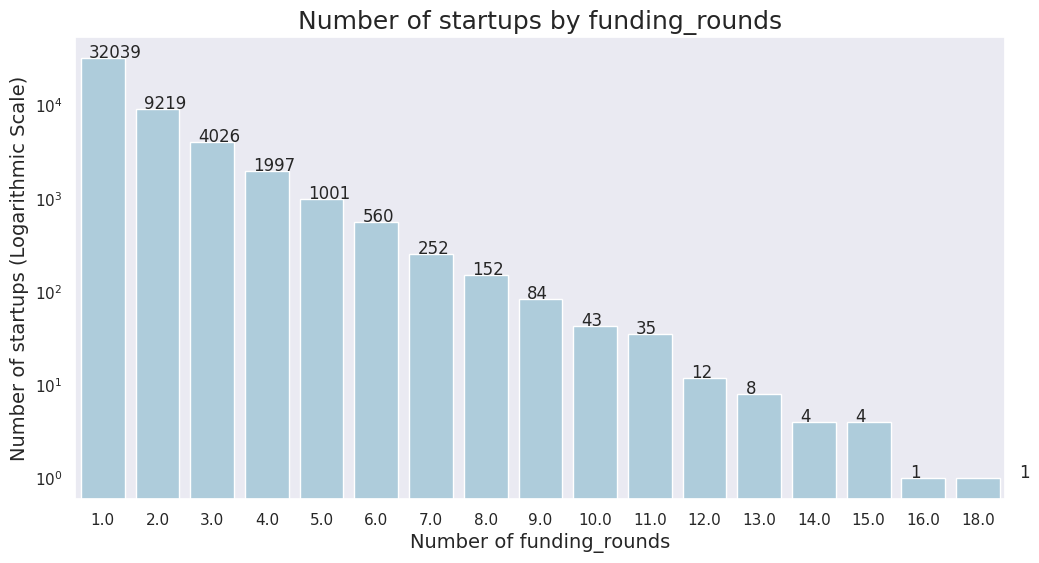

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['funding_rounds'].value_counts().index, y=data['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(data['funding_rounds'].value_counts().index,data['funding_rounds'].value_counts())

- Majority of Startups Receive Few Funding Rounds, All the startups had at least 1 funding round.

In [ ]:
data['category_list'].value_counts()

category_list
|Software|                                                                                     3650
|Biotechnology|                                                                                3597
|E-Commerce|                                                                                   1263
|Mobile|                                                                                       1211
|Curated Web|                                                                                  1120
                                                                                               ... 
|Fashion|Digital Media|Marketplaces|E-Commerce|                                                   1
|Advertising|Web Development|App Marketing|Enterprises|Cloud Computing|Enterprise Software|       1
|Web Design|Software|Web Tools|Web Development|Enterprise Software|                               1
|3D|Web Tools|Entertainment|Curated Web|                                                          1
|Web Development|Advertising|Wireless|Mobile|                                                     1
Name: count, Length: 16675, dtype: int64

-We have more than 16670 different category types.

We can see that at the end there are categories with only one startup, but this is mainly due to the fact that the company fits into multiple categories, having a combination of several of them.

#### How many startups are in the dataframe?

In [ ]:
data.count().max()

54294

#### How many startups achieve the success?

In [ ]:
success_ratio = data.success.mean()*100
print(f'{data.success[data.success == 1].count()} startups reach success, that means {success_ratio:.2f}% of total Startups.')

3692 startups reach success, that means 6.80% of total Startups.


#### How many startups fail?

In [ ]:
fail_ratio = data.fail.mean()*100
print(f'{data.fail[data.fail == 1].count()} startups fail, that means {fail_ratio:.2f}% of Total Startups')

2603 startups fail, that means 4.79% of Total Startups


#### How many startups are operating?

In [ ]:
operating_ratio = data.operating.mean()*100
print(f'{data.operating[data.operating == 1].count()} startups are in operation, that means {operating_ratio:.2f}% of Total Startups')

47999 startups are in operation, that means 88.41% of Total Startups


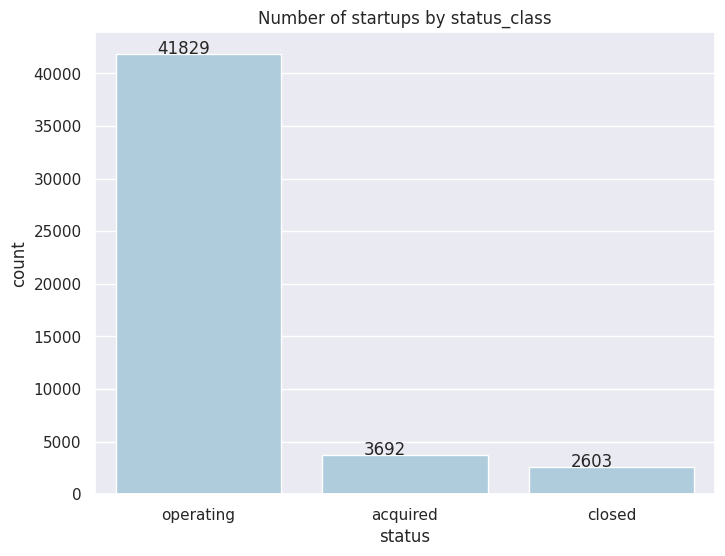

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')
sns.barplot(x= data.status.value_counts().index, y=data.status.value_counts())
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.20,y[i],y[i])

addlabels(data.status.value_counts().index,data.status.value_counts())

- Majority of the startups are Operating, some of them are acquired, while just a few of them are closed.

In [ ]:
print(f'Number of startups: {data.count().max()}')
print(f'{data.success[data.success == 1].count()} startups reach success, that means {data.success.mean()*100:.2f}% of total Startups')
print(f'{data.fail[data.fail == 1].count()} startups fail, that means {data.fail.mean()*100:.2f}% of total Startups')
print(f'{data.operating[data.operating == 1].count()} startups are in operation, that means {operating_ratio:.2f}% of Total Startups')

Number of startups: 54294
3692 startups reach success, that means 6.80% of total Startups
2603 startups fail, that means 4.79% of total Startups
47999 startups are in operation, that means 88.41% of Total Startups


([<matplotlib.patches.Wedge at 0x7c52437c33a0>,
 [Text(-0.43942366544054445, -1.0084179898488506, 'operating'),
  Text(0.6585040409379509, 1.0031811541632896, 'acquired'),
  Text(0.20293261160196577, 1.1827165151245695, 'closed')],
 [Text(-0.2396856356948424, -0.5500461762811911, '86.9%'),
  Text(0.3841273572138047, 0.5851890065952521, '7.7%'),
  Text(0.11837735676781336, 0.6899179671559987, '5.4%')])

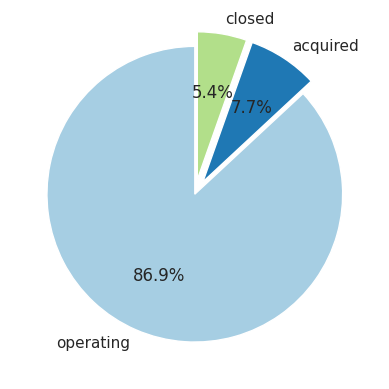

In [ ]:
x = data["status"].value_counts()
plt.pie(x,labels=x.index,startangle=90,autopct="%1.1f%%",explode = (0,0.1,0.1))


In [ ]:
USA_data = data[data["country_code"]=="USA"]

Text(0.5, 1.0, 'Top cities in Usa')

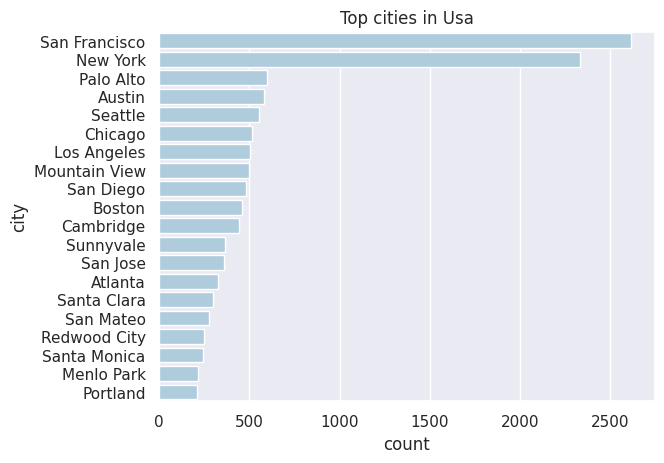

In [ ]:
sns.countplot(data=USA_data,y="city",order = USA_data["city"].value_counts()[:20].index)
plt.title("Top cities in Usa")

- Cities in USA with the most Startups are San Francisco, New York, Palo Alto, Austin & Seattle

Text(0.5, 1.0, 'Top startups in usa market')

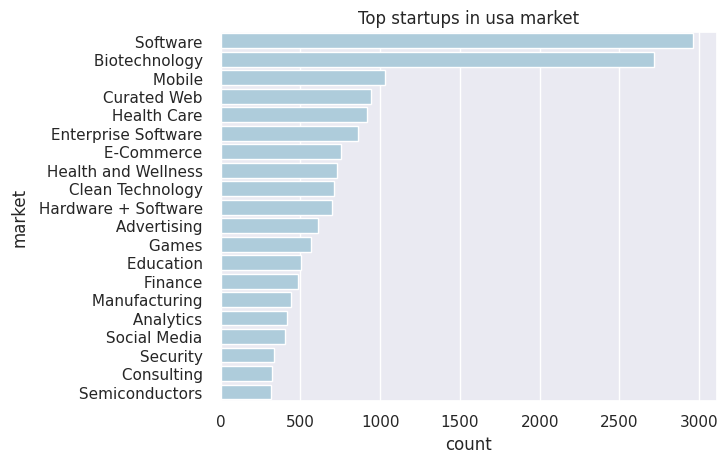

In [ ]:
sns.countplot(data=USA_data,y="market",order = USA_data["market"].value_counts()[:20].index)
plt.title("Top startups in usa market")

-  Markets that dominate the US Startup Scene are Software, Biotechnology, Mobile, Curated Web, & Enterprise Software.

Text(0.5, 1.0, 'Top states in USA')

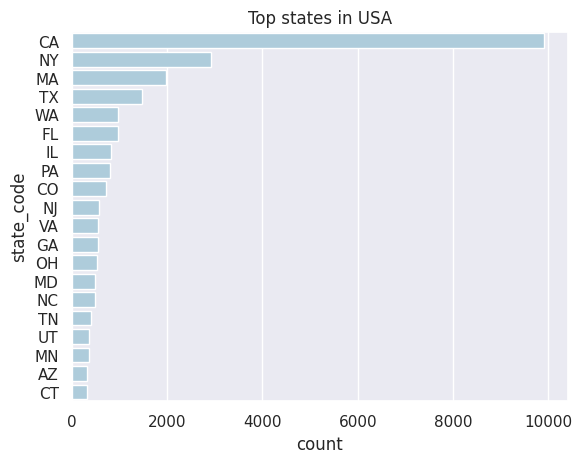

In [ ]:
sns.countplot(data=USA_data,y="state_code",order = USA_data["state_code"].value_counts()[:20].index)
plt.title("Top states in USA")


- California, New York, Masachussets, Texas and Washington are the states with the most startups in US.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2000.0'),
  Text(1, 0, '2001.0'),
  Text(2, 0, '2002.0'),
  Text(3, 0, '2003.0'),
  Text(4, 0, '2004.0'),
  Text(5, 0, '2005.0'),
  Text(6, 0, '2006.0'),
  Text(7, 0, '2007.0'),
  Text(8, 0, '2008.0'),
  Text(9, 0, '2009.0'),
  Text(10, 0, '2010.0'),
  Text(11, 0, '2011.0'),
  Text(12, 0, '2012.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2014.0')])

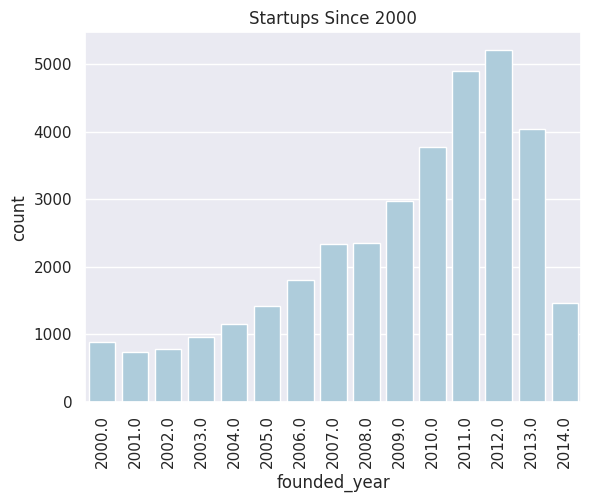

In [ ]:
sns.countplot(data=data[data["founded_year"]>=2000],x="founded_year")
plt.title("Startups Since 2000")
plt.xticks(rotation=90)

- Years 2010-2013 witnessed a particularly sharp rise in startup activity, with a peak in 2012. This period likely coincided with favorable economic conditions, increased access to funding, and technological advancements.
- The graph indicates a slight decline in startup activity after 2012.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '1990.0'),
  Text(1, 0, '1991.0'),
  Text(2, 0, '1992.0'),
  Text(3, 0, '1993.0'),
  Text(4, 0, '1994.0'),
  Text(5, 0, '1995.0'),
  Text(6, 0, '1996.0'),
  Text(7, 0, '1997.0'),
  Text(8, 0, '1998.0'),
  Text(9, 0, '1999.0'),
  Text(10, 0, '2000.0')])

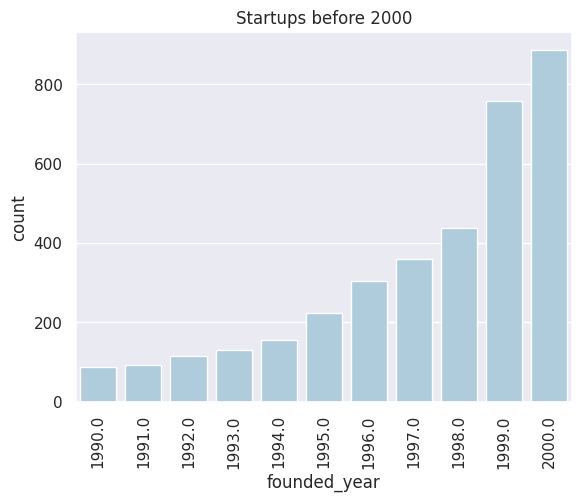

In [ ]:
sns.countplot(data=data[(data["founded_year"]>=1990) & (data["founded_year"]<=2000)],x="founded_year")
plt.title("Startups before 2000")
plt.xticks(rotation=90)

-The graph illustrates a clear upward trend in the number of startups founded between 1990 and 2000. This suggests a gradual increase in entrepreneurial activity during this period.

In [ ]:
## Companies,who got seed fundings
data_seed = data[data["seed"]>0]

Text(0.5, 1.0, 'Comapanies status who got seed funding')

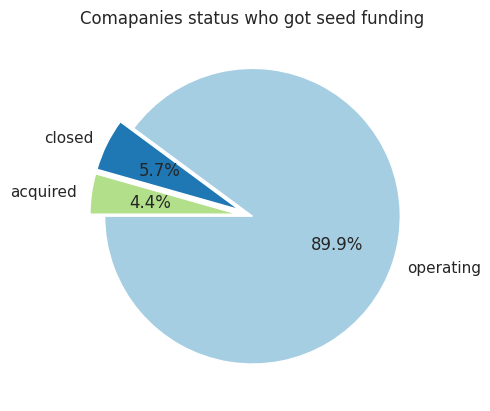

In [ ]:
y = data_seed["status"].value_counts()
plt.pie(y,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status who got seed funding")


- The most striking observation is that a substantial majority (89.9%) of companies that received seed funding are still operating.
- This suggests that seed funding can play a crucial role in enabling startups to establish themselves and continue their operations.

In [ ]:
## Companies who did not get seed funding
data_seed_not = data[data["seed"]==0]

Text(0.5, 1.0, 'Comapanies status who did not get seed funding')

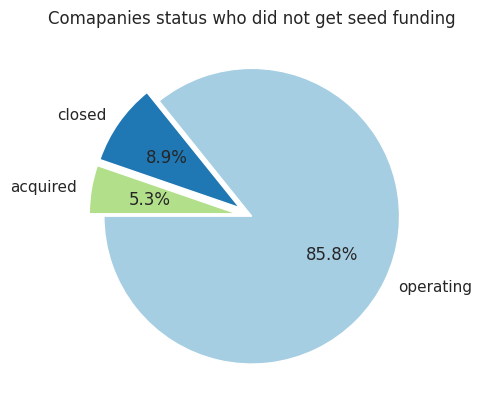

In [ ]:
z = data_seed_not["status"].value_counts()
plt.pie(z,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status who did not get seed funding")


- Higher Closure Rate: Compared to companies that received seed funding, the percentage of companies that closed down without seed funding (8.9%) is relatively higher.
- This suggests that the lack of seed funding can increase the risk of closure.

In [ ]:
High_funded = data[data["funding_total_usd"]>1000000000.0]
Low_funded = data[data["funding_total_usd"]<20000.0]

Text(0.5, 1.0, 'Comapanies status whose fundings are more than 1 Billion US$')

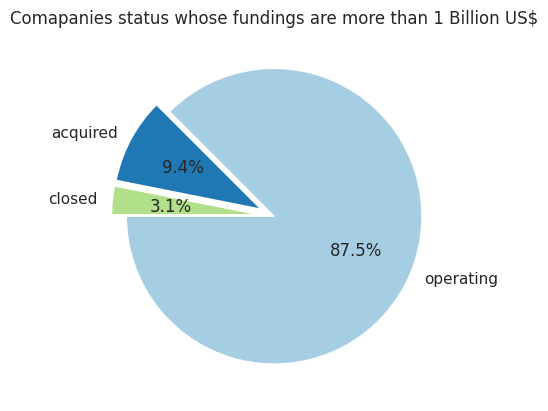

In [ ]:
x = High_funded["status"].value_counts()
plt.pie(x,labels=x.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status whose fundings are more than 1 Billion US$")


- The most striking observation is that a substantial majority (87.5%) of companies that have received funding exceeding 1 billion US dollars are still operating.
- This suggests that significant funding can provide a strong foundation for long-term business success.

Text(0.5, 1.0, 'Comapanies status whose fundings are less than 20k US$')

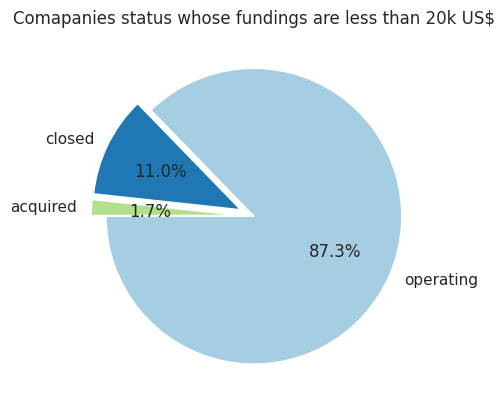

In [ ]:
x = Low_funded["status"].value_counts()
plt.pie(x,labels=x.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status whose fundings are less than 20k US$")


- High Operating Success Rate: The most striking observation is that a substantial majority (87.3%) of companies that received funding less than 20k US dollars are still operating.
- This suggests that even with limited initial funding, a significant number of companies can achieve operational success.

(array([28.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.04504000e+09, 3.94848630e+09, 6.85193260e+09, 9.75537890e+09,
        1.26588252e+10, 1.55622715e+10, 1.84657178e+10, 2.13691641e+10,
        2.42726104e+10, 2.71760567e+10, 3.00795030e+10]),
 <BarContainer object of 10 artists>)

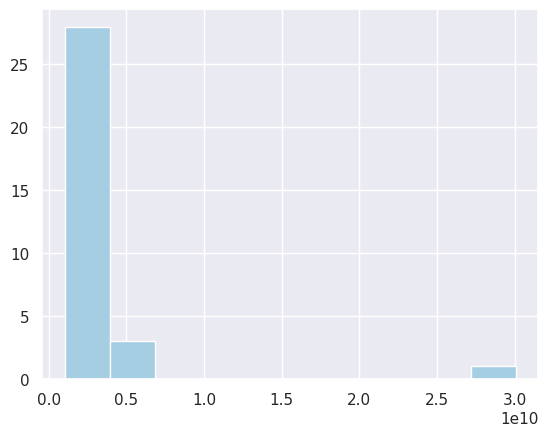

In [ ]:
plt.hist(High_funded["funding_total_usd"])

- The histogram reveals a highly skewed distribution of funding_total_usd for the subset of companies with funding exceeding 1 billion USD.
- This indicates that a small number of companies have received significantly larger funding amounts compared to the majority.

(array([135.,  76., 104.,  40.,  24., 212., 109., 178.,  69., 123.]),
 array([1.00000e+00, 2.00080e+03, 4.00060e+03, 6.00040e+03, 8.00020e+03,
        1.00000e+04, 1.19998e+04, 1.39996e+04, 1.59994e+04, 1.79992e+04,
        1.99990e+04]),
 <BarContainer object of 10 artists>)

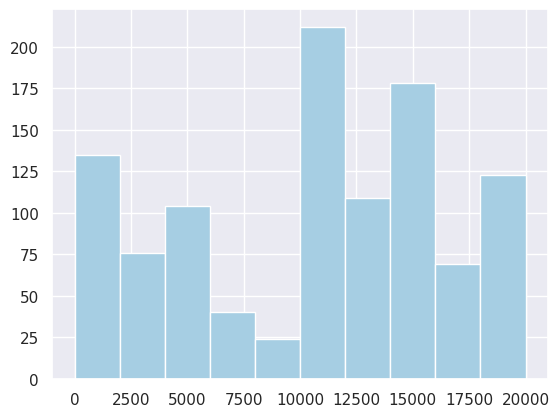

In [ ]:
plt.hist(Low_funded["funding_total_usd"])

- The histogram reveals a skewed distribution of funding_total_usd for the subset of companies with funding less than 20,000 USD.
- This indicates that a large number of companies received very little funding.

<Axes: xlabel='count', ylabel='country_code'>

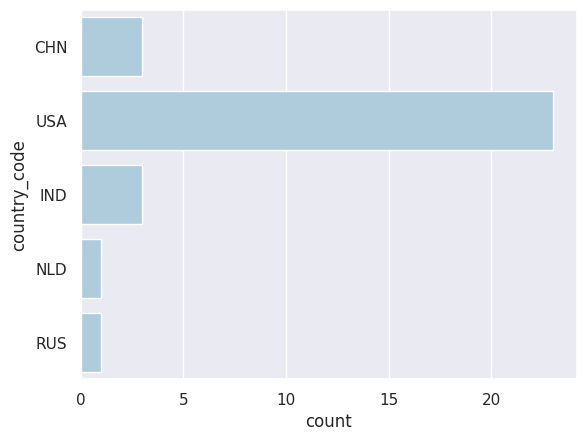

In [ ]:
sns.countplot(data=High_funded,y="country_code")

- The USA has the highest count of companies with funding exceeding 1 billion USD, indicating a strong presence of well-funded companies in the US.
- China and India Significant: China and India also have a notable number of companies with high funding, suggesting a growing presence of well-funded companies in these emerging economies.

<Axes: xlabel='count', ylabel='country_code'>

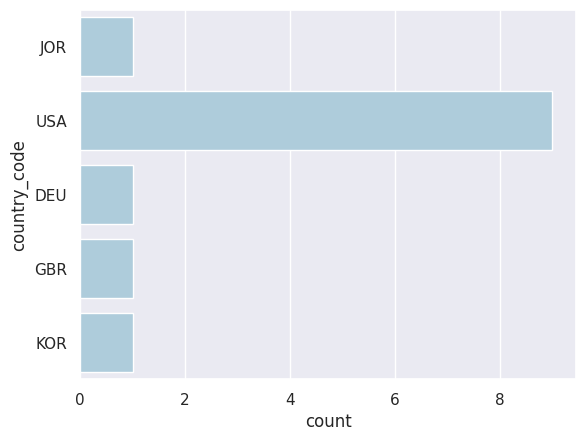

In [ ]:
# Assuming 'Low_funded' is your DataFrame and 'funding' is the column for funding count

# 1. Sort the DataFrame by funding count in ascending order
Low_funded_sorted = Low_funded.sort_values(by='funding_total_usd', ascending=True)

# 2. Select the bottom 5 countries
bottom_5_countries = Low_funded_sorted.head(16)

# 3. Create the countplot using seaborn
sns.countplot(data=bottom_5_countries, y="country_code")

- USA Dominates: The USA has the highest count of companies with funding less than $20,000.

- Countries like Japan (JOR), Germany (DEU), Great Britain (GBR), and Korea (KOR) also have a presence in the low-funding category, though to a lesser extent compared to the USA.

<Axes: xlabel='count', ylabel='region'>

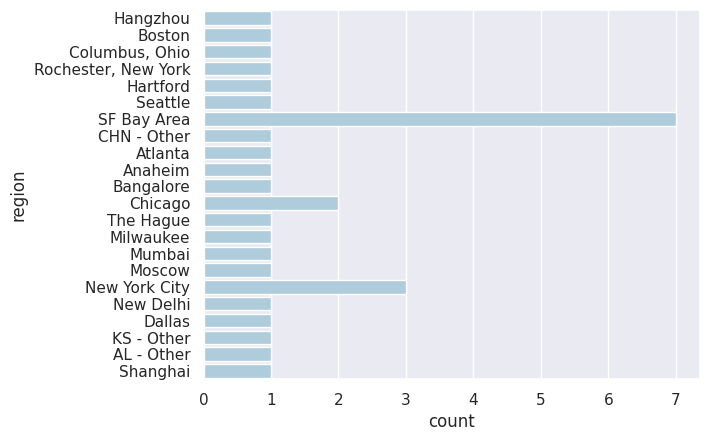

In [ ]:
sns.countplot(data=High_funded,y="region")

- The SF Bay Area stands out with the highest count of companies that have received funding exceeding 1 billion USD, indicating a strong concentration of highly funded companies in this region.

- New York City and Other Major Hubs also show a significant number of low funded companies.

<Axes: xlabel='count', ylabel='region'>

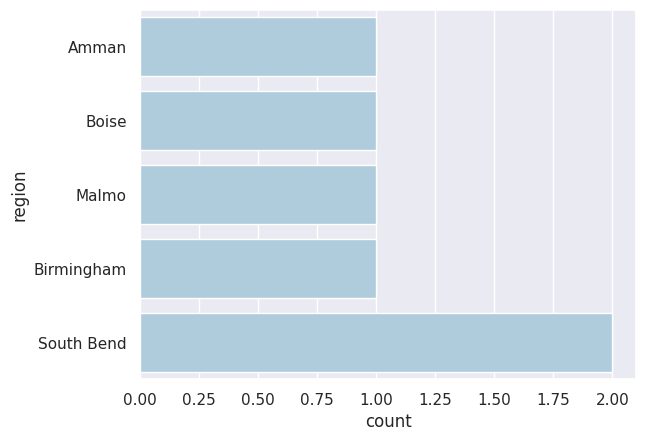

In [ ]:
# Assuming 'Low_funded' is your DataFrame and 'funding' is the column for funding count

# 1. Group by region and sum the funding count
region_funding_sums = Low_funded.groupby('region')['funding_total_usd'].sum()

# 2. Sort the regions by funding count in ascending order
sorted_regions = region_funding_sums.sort_values()

# 3. Select the bottom 5 regions
bottom_5_regions = sorted_regions.head(5).index.tolist()

# 4. Create the countplot using seaborn
sns.countplot(data=Low_funded[Low_funded['region'].isin(bottom_5_regions)], y="region", order=bottom_5_regions)

- The countplot shows a clear uneven distribution of low-funded companies across different regions. Some regions, like South Bend, have a significantly higher count of companies with funding less than $20,000 compared to others like Amman or Boise.

<Axes: xlabel='count', ylabel='market'>

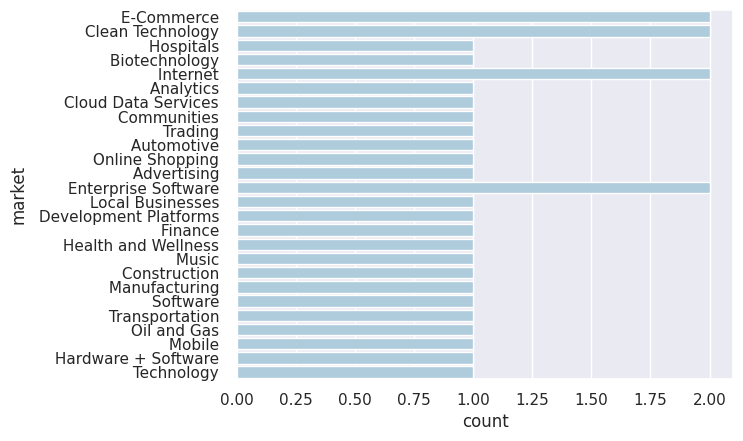

In [ ]:
sns.countplot(data=High_funded,y="market")

- The countplot clearly shows that "Software" is the most frequent market for companies with funding exceeding 1 billion USD. This suggests that the software industry attracts significant investment capital.

- Other Prominent Markets for high-funded companies include "Internet," "E-Commerce," and "Mobile." This indicates a strong focus on technology-driven sectors.

<Axes: xlabel='count', ylabel='market'>

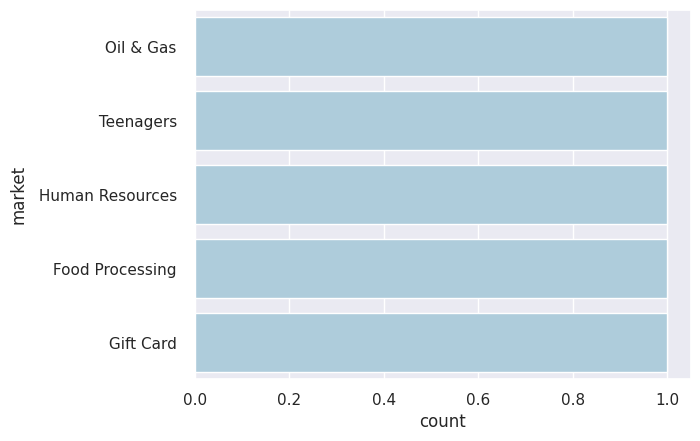

In [ ]:
# Assuming 'Low_funded' is your DataFrame and 'funding' is the column for funding count

# 1. Group by market and sum the funding count
market_funding_sums = Low_funded.groupby('market')['funding_total_usd'].sum()

# 2. Sort the markets by funding count in ascending order
sorted_markets = market_funding_sums.sort_values()

# 3. Select the bottom 5 markets
bottom_5_markets = sorted_markets.head(5).index.tolist()

# 4. Create the countplot using seaborn
sns.countplot(data=Low_funded[Low_funded['market'].isin(bottom_5_markets)],
              y="market",
              order=bottom_5_markets)

- The countplot shows a clear uneven distribution of low-funded companies across different markets. Some markets, like "Gift Card" and "Food Processing," have a significantly higher count of companies with funding less than $20,000 compared to others like "Oil & Gas" and "Teenagers.

<Axes: xlabel='count', ylabel='category_list'>

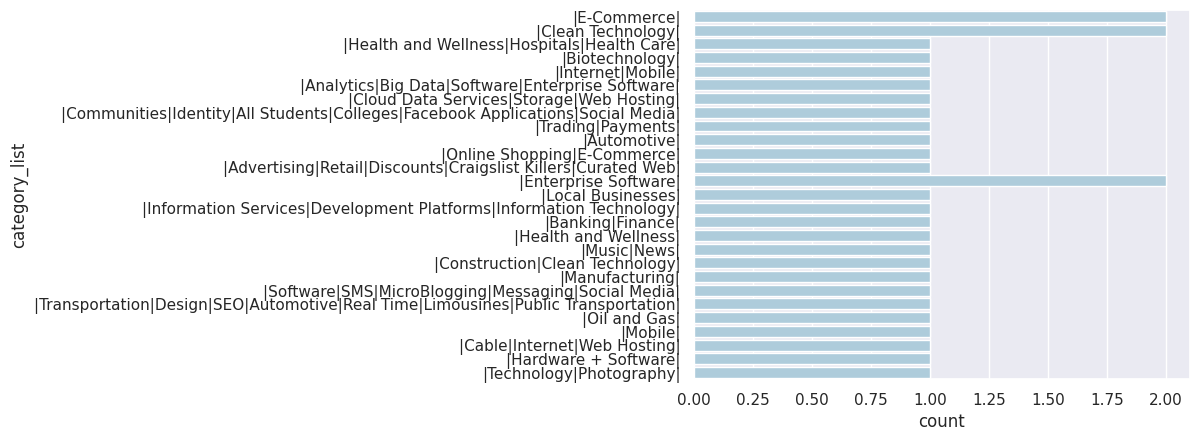

In [ ]:
sns.countplot(data=High_funded,y="category_list")

- Software Dominance: The countplot clearly shows that "Software" is the most frequent category for companies with funding exceeding 1 billion USD. This suggests that the software industry attracts significant investment capital.

- Other Prominent Categories: Other prominent categories for high-funded companies include "Internet," "E-Commerce," and "Mobile." This indicates a strong focus on technology-driven sectors.

<Axes: xlabel='count', ylabel='category_list'>

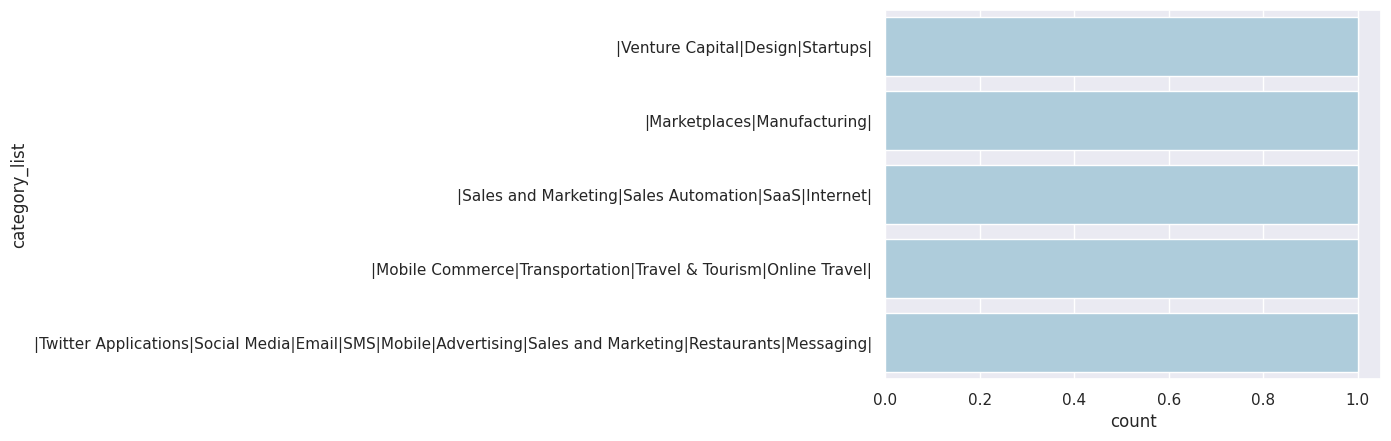

In [ ]:
# Assuming 'Low_funded' is your DataFrame and 'funding' is the column for funding count

# 1. Group by category_list and sum the funding count
category_funding_sums = Low_funded.groupby('category_list')['funding_total_usd'].sum()

# 2. Sort the categories by funding count in ascending order
sorted_categories = category_funding_sums.sort_values()

# 3. Select the bottom 5 categories
bottom_5_categories = sorted_categories.head(5).index.tolist()

# 4. Create the countplot using seaborn
sns.countplot(data=Low_funded[Low_funded['category_list'].isin(bottom_5_categories)],
              y="category_list",
              order=bottom_5_categories)

- The countplot shows a clear uneven distribution of low-funded companies across different categories. Some categories, like "[Venture Capital|Design|Startups]" and "[Marketplaces|Manufacturing]" have a significantly higher count of companies with funding less than $20,000 compared to others like "[Twitter Applications|Social Media|SMS|Email|SMS|Mobile|Advertising|Sales and Marketing|Restaurants|Messaging]".

<Axes: xlabel='count', ylabel='founded_year'>

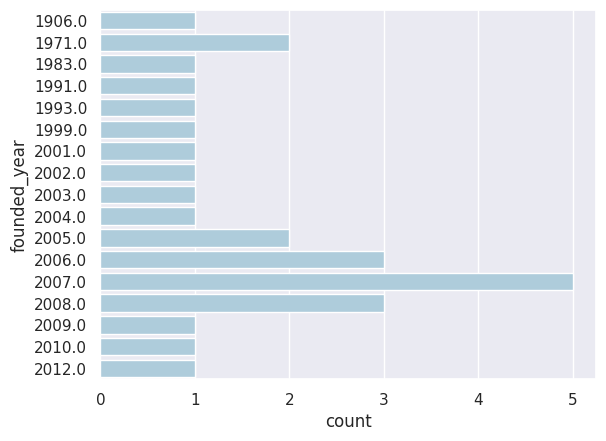

In [ ]:
sns.countplot(data=High_funded,y="founded_year")

- The countplot shows a clear uneven distribution of high-funded companies across different founded years.
- There's a significant increase in the number of high-funded companies from 2006 onwards, with a peak around 2007-2008.


<Axes: xlabel='count', ylabel='founded_year'>

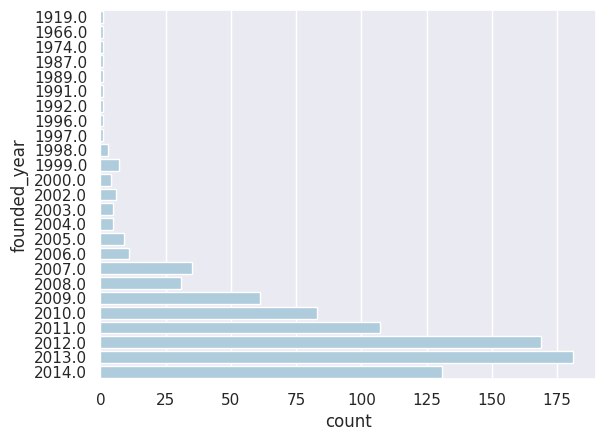

In [ ]:
sns.countplot(data=Low_funded,y="founded_year")

- The countplot shows a clear uneven distribution of low-funded companies across different founded years.
- There's a significant increase in the number of low-funded companies from 2006 onwards, with a peak around 2012-2014.

<Axes: ylabel='funding_total_usd'>

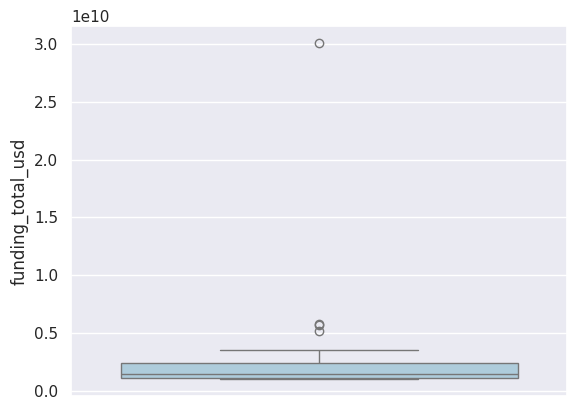

In [ ]:
sns.boxplot(y="funding_total_usd",data=High_funded)


- The boxplot shows a significant range in the funding amounts for companies with funding exceeding 1 billion USD.
- There are some outliers with extremely high funding amounts, suggesting a high level of variability within this group.

<Axes: ylabel='funding_total_usd'>

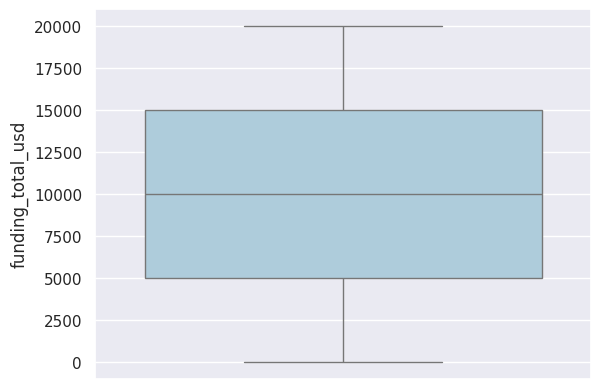

In [ ]:
sns.boxplot(y="funding_total_usd",data=Low_funded)

- The boxplot shows that the funding_total_usd for companies in the 'Low_funded' category is concentrated within a relatively narrow range, likely between 0 and around 15,000 USD. This suggests that a majority of these companies have received very small amounts of funding.

In [ ]:
data_seed_only = data[data["funding_total_usd"]==data["seed"]]

9706


Text(0.5, 1.0, 'Companies status who got only  seed funding')

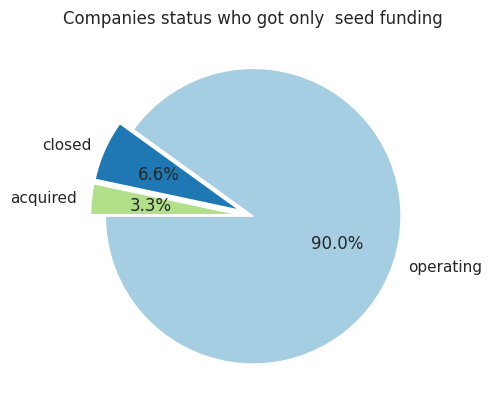

In [ ]:
z = data_seed_only["status"].value_counts()
print(sum(z))
plt.pie(z,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Companies status who got only  seed funding")


- The most striking observation is that a substantial majority (90.0%) of companies that received only seed funding are still operating.
- This suggests that seed funding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_venture_only = data[data["funding_total_usd"]==data["venture"]]

16874


Text(0.5, 1.0, 'Comapanies status who only got venture funding')

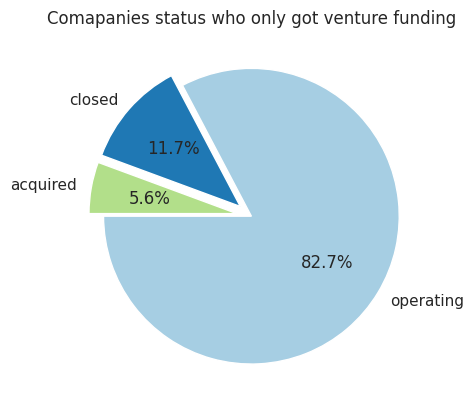

In [ ]:
zv = data_venture_only["status"].value_counts()
print(sum(zv))
plt.pie(zv,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status who only got venture funding")

-  The most striking observation is that a substantial majority (82.7%) of companies that received only venture funding are still operating.
-  This suggests that venture funding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_equity_crowdfunding_only = data[data["funding_total_usd"]==data["equity_crowdfunding"]]

461


Text(0.5, 1.0, 'Comapanies status who only got equity_crowdfunding')

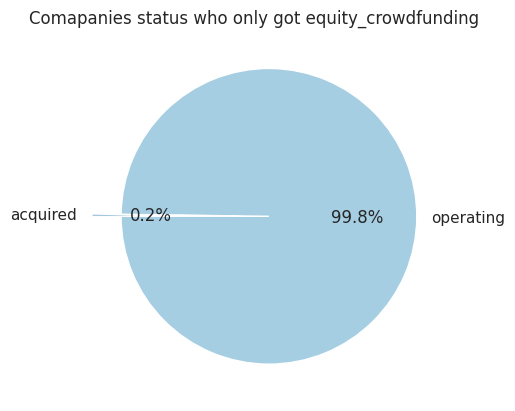

In [ ]:
ze = data_equity_crowdfunding_only["status"].value_counts()
print(sum(ze))
plt.pie(ze,labels=ze.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1))
plt.title("Comapanies status who only got equity_crowdfunding")

- The most striking observation is that a substantial majority (99.8%) of companies that received only equity_crowdfunding are still operating.
- This suggests that equity_crowdfunding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_undisclosed_only = data[data["funding_total_usd"]==data["undisclosed"]]

580


Text(0.5, 1.0, 'Comapanies status who only got undisclosed funding')

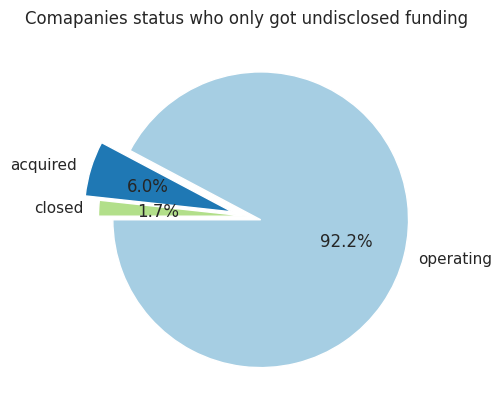

In [ ]:
zu = data_undisclosed_only["status"].value_counts()
print(sum(zu))
plt.pie(zu,labels=zu.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Comapanies status who only got undisclosed funding")

- The most striking observation is that a substantial majority (92.2%) of companies that received only undisclosed funding are still operating.
- This suggests that undisclosed funding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_convertible_note_only = data[data["funding_total_usd"]==data["convertible_note"]]

206


Text(0.5, 1.0, 'Comapanies status who only got convertible_note')

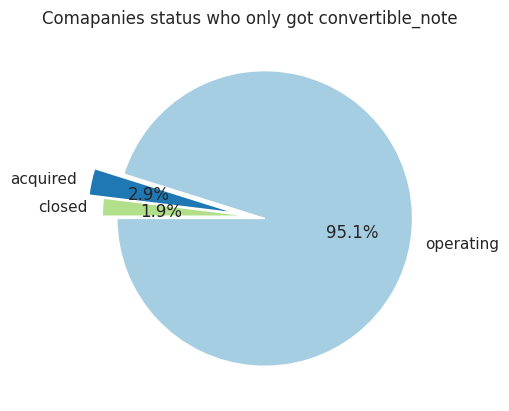

In [ ]:
zc = data_convertible_note_only["status"].value_counts()
print(sum(zc))
plt.pie(zc,labels=zc.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Comapanies status who only got convertible_note")

- The observation is that a substantial majority (95.1%) of companies that received only convertible note funding are still operating.
- This suggests that convertible note funding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_debt_financing_only = data[data["funding_total_usd"]==data["debt_financing"]]

1443


Text(0.5, 1.0, 'Comapanies status who only got debt_financing')

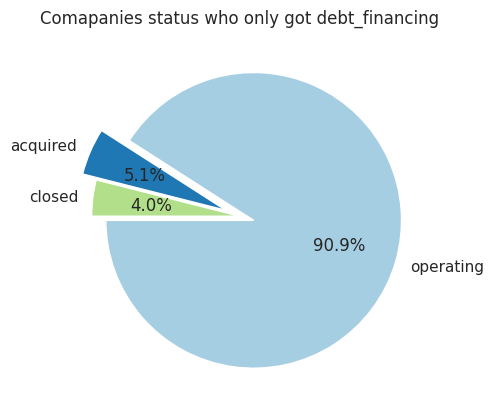

In [ ]:
zd = data_debt_financing_only["status"].value_counts()
print(sum(zd))
plt.pie(zd,labels=zd.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Comapanies status who only got debt_financing")

- A substantial majority (90.9%) of companies that received only debt financing are still operating.
- This suggests that debt financing, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_angel_only = data[data["funding_total_usd"]==data["angel"]]

1583


Text(0.5, 1.0, 'Comapanies status who only got funding from angel investors')

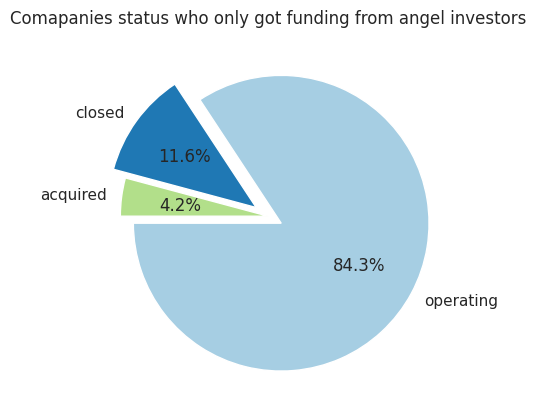

In [ ]:
za = data_angel_only["status"].value_counts()
print(sum(za))
plt.pie(za,labels=za.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Comapanies status who only got funding from angel investors")

- A substantial majority (84.3%) of companies that received only angel investor funding are still operating.
- This suggests that angel investment, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_grant_only = data[data["funding_total_usd"]==data["grant"]]

589


Text(0.5, 1.0, 'Comapanies status who only got funding from grants')

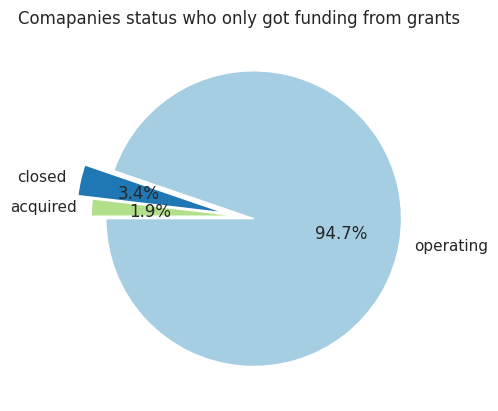

In [ ]:
zg = data_grant_only["status"].value_counts()
print(sum(zg))
plt.pie(zg,labels=zg.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Comapanies status who only got funding from grants")

- a substantial majority (94.7%) of companies that received only grant funding are still operating.
- This suggests that grant funding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

In [ ]:
data_private_equity_only = data[data["funding_total_usd"]==data["private_equity"]]

669


Text(0.5, 1.0, 'Companies status who only got funding from private_equity')

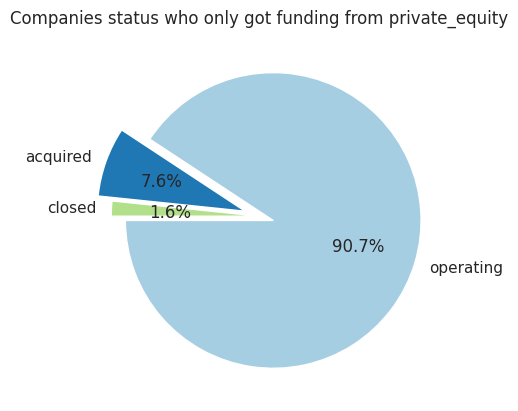

In [ ]:
zp = data_private_equity_only["status"].value_counts()
print(sum(zp))
plt.pie(zp,labels=zp.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from private_equity")

- A substantial majority (90.7%) of companies that received only private equity funding are still operating.
- This suggests that private equity funding, even as the sole source of funding, can enable a significant number of companies to establish themselves and continue their operations.

In [ ]:
data_post_ipo_equity_only = data[data["funding_total_usd"]==data["post_ipo_equity"]]

119


Text(0.5, 1.0, 'Companies status who only got funding from from equity dilution after IPO')

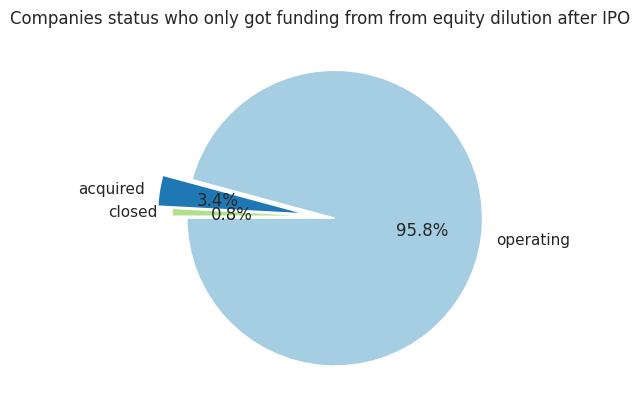

In [ ]:
zpo = data_post_ipo_equity_only["status"].value_counts()
print(sum(zpo))
plt.pie(zpo,labels=zpo.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from from equity dilution after IPO")

- A substantial majority (95.8%) of companies that received funding solely through equity dilution after IPO are still operating.
- This suggests that post-IPO equity dilution, while diluting existing shareholder stakes, can provide companies with the capital necessary to continue operations, pursue growth strategies, and navigate challenges.

In [ ]:
data_post_ipo_debt_only = data[data["funding_total_usd"]==data["post_ipo_debt"]]

status
operating    29
Name: count, dtype: int64
29


Text(0.5, 1.0, 'Companies status who only got funding from debts after IPO')

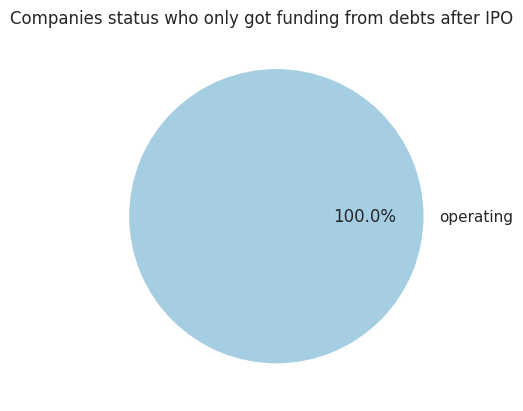

In [ ]:
zpd = data_post_ipo_debt_only["status"].value_counts()
print(zpd)
print(sum(zpd))
plt.pie(zpd,labels=zpd.index,startangle=180,autopct="%1.1f%%",explode = (0.1,))
plt.title("Companies status who only got funding from debts after IPO")

- A staggering 100% of companies that received funding solely through debt after their IPO are still operating. This suggests that debt financing after IPO, while carrying inherent risks, has been highly effective in supporting the continued operations of these companies.

-The pie chart reveals that none of the companies in this category have been acquired or closed down. This suggests that debt financing after IPO has not significantly impacted the likelihood of acquisition or closure for these companies.

In [ ]:
data_secondary_market_only = data[data["funding_total_usd"]==data["secondary_market"]]

status
operating    4
acquired     1
Name: count, dtype: int64
5


Text(0.5, 1.0, 'Companies status who only got funding from secondary_market')

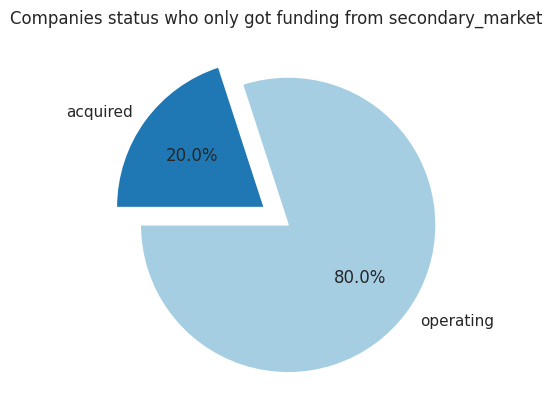

In [ ]:
zsm = data_secondary_market_only["status"].value_counts()
print(zsm)
print(sum(zsm))
plt.pie(zsm,labels=zsm.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1))
plt.title("Companies status who only got funding from secondary_market")

- A substantial majority (80%) of companies that received funding solely from secondary markets are still operating. This suggests that secondary market funding, while not the primary source of capital for most startups, can provide a degree of stability and support for companies that have already achieved a certain level of success.

- The percentage of companies that were acquired after receiving funding solely from secondary markets (20%) is relatively moderate. This indicates that while secondary market funding can increase the visibility and attractiveness of a company to potential acquirers, it's not a primary driver of acquisitions.

- Importantly, the pie chart shows that none of the companies in this category have closed down. This suggests that companies that have successfully accessed secondary market funding have a strong likelihood of continued operations.

In [ ]:
data_product_crowdfunding_only = data[data["funding_total_usd"]==data["product_crowdfunding"]]

status
operating    137
acquired       1
closed         1
Name: count, dtype: int64
139


Text(0.5, 1.0, 'Companies status who only got funding from crowdfunding')

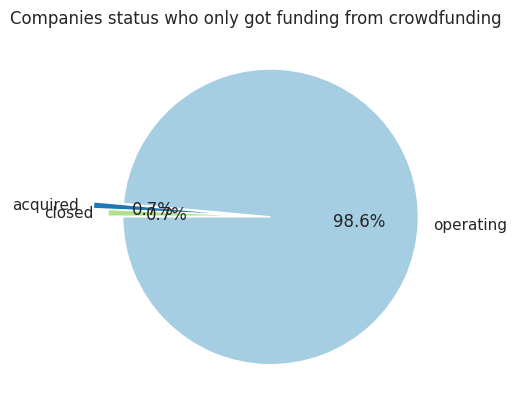

In [ ]:
zpc = data_product_crowdfunding_only["status"].value_counts()
print(zpc)
print(sum(zpc))
plt.pie(zpc,labels=zpc.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from crowdfunding")

- A substantial majority (98.6%) of companies that received only crowdfunding are still operating. This suggests that crowdfunding, even as the sole source of funding, can enable a significant number of startups to establish themselves and continue their operations.

- The percentage of companies that were acquired after receiving only crowdfunding (0.7%) is extremely low. This indicates that crowdfunding, while not typically geared towards generating high returns for investors, can support the growth and development of innovative companies.

- The percentage of companies that closed down after receiving only crowdfunding (0.7%) is also very low. This suggests that crowdfunding, while often used for niche projects or specific goals, can provide a degree of stability and support for companies to navigate challenges and potentially achieve long-term success.

In [ ]:
data_round_A_only = data[data["funding_total_usd"]==data["round_A"]]

status
operating    2660
acquired      368
closed        229
Name: count, dtype: int64
3257


Text(0.5, 1.0, 'Companies status who only got funding from round_A')

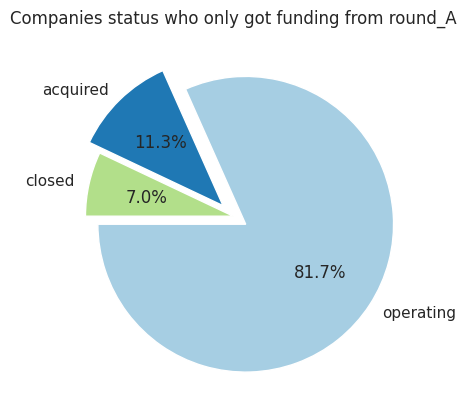

In [ ]:
zra = data_round_A_only["status"].value_counts()
print(zra)
print(sum(zra))
plt.pie(zra,labels=zra.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from round_A")

- A substantial majority (81.7%) of companies that received funding solely from Round A are still operating. This suggests that Round A funding, while a significant investment milestone, can enable a significant number of startups to establish themselves and continue their operations.

- The percentage of companies that were acquired after receiving only Round A funding (11.3%) is moderate. This indicates that Round A funding can increase the likelihood of a company being acquired by a larger entity, but it's not the primary driver of acquisitions for all companies at this stage.

- The percentage of companies that closed down after receiving only Round A funding (7.0%) is relatively low. This suggests that Round A funding, when managed effectively, can provide a degree of resilience, enabling companies to navigate challenges and potentially achieve long-term success.


In [ ]:
data_round_B_only = data[data["funding_total_usd"]==data["round_B"]]

status
operating    721
acquired     148
closed        70
Name: count, dtype: int64
939


Text(0.5, 1.0, 'Companies status who only got funding from round_B')

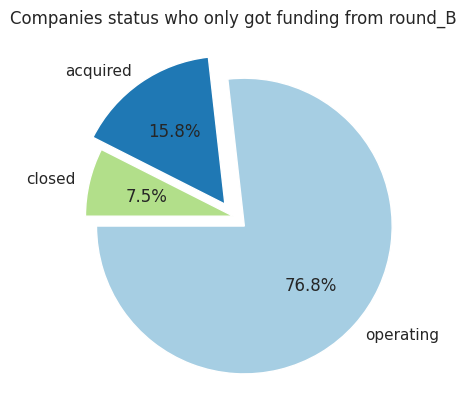

In [ ]:
zrb = data_round_B_only["status"].value_counts()
print(zrb)
print(sum(zrb))
plt.pie(zrb,labels=zrb.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from round_B")

- A substantial majority (76.8%) of companies that received funding solely from Round B are still operating. This suggests that Round B funding, while typically provided at a later stage of company development, can significantly enhance the chances of long-term operational success.
- Percentage of companies that were acquired after receiving only Round B funding (15.8%) is moderate. This indicates that Round B funding can increase the likelihood of a company being acquired by a larger entity, reflecting a higher level of maturity and attractiveness to potential acquirers compared to earlier funding stages.
- Percentage of companies that closed down after receiving only Round B funding (7.5%) is relatively low. This suggests that Round B funding, often provided to companies with a proven track record and a clear growth trajectory, can provide a degree of resilience and support for navigating challenges.

In [ ]:
data_round_C_only = data[data["funding_total_usd"]==data["round_C"]]

369


Text(0.5, 1.0, 'Companies status who only got funding from round_C')

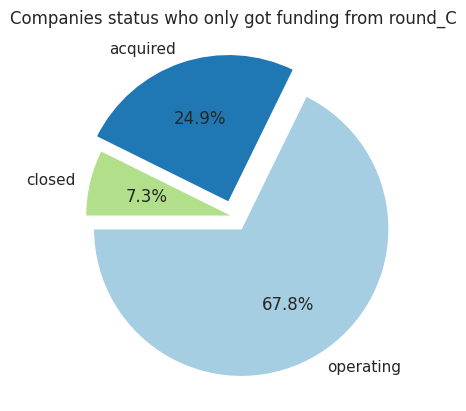

In [ ]:
zrc = data_round_C_only["status"].value_counts()
print(sum(zrc))
plt.pie(zrc,labels=zrc.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from round_C")

- A significant majority (67.8%) of companies that received funding solely from Round C are still operating. This suggests that Round C funding, typically provided to well-established companies with a proven track record, significantly enhances the chances of long-term operational success.

- Compared to earlier funding stages, the acquisition rate for companies funded solely from Round C is notably higher at 24.9%. This indicates that Round C funding brings companies closer to a potential exit strategy, making them more attractive targets for acquisition by larger companies or through mergers.

- The percentage of companies that closed down after receiving only Round C funding (7.3%) is relatively low. This suggests that Round C funding, when managed effectively, can provide a degree of resilience and support for navigating challenges and achieving long-term success.


In [ ]:
data_round_D_only = data[data["funding_total_usd"]==data["round_D"]]

147


Text(0.5, 1.0, 'Companies status who only got funding from round_D')

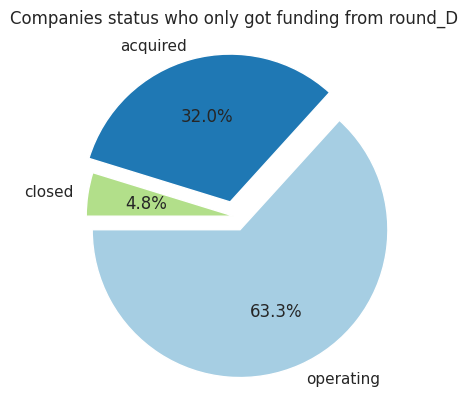

In [ ]:
zrd = data_round_D_only["status"].value_counts()
print(sum(zrd))
plt.pie(zrd,labels=zrd.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from round_D")

- A significant majority (63.3%) of companies that received funding solely from Round D are still operating. This indicates that Round D funding, typically provided to well-established and mature companies, significantly enhances the chances of long-term operational success.

- The acquisition rate for companies funded solely from Round D is notably high at 32.0%. This suggests that Round D funding often attracts the attention of larger companies and increases the likelihood of being acquired.

- The percentage of companies that closed down after receiving only Round D funding (4.8%) is relatively low. This suggests that Round D funding, when managed effectively, can provide a degree of resilience and support for navigating challenges and achieving long-term success.

In [ ]:
data_round_E_only = data[data["funding_total_usd"]==data["round_E"]]

55


Text(0.5, 1.0, 'Companies status who only got funding from round_E')

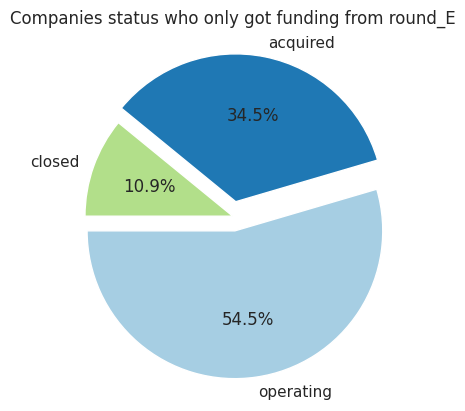

In [ ]:
zre = data_round_E_only["status"].value_counts()
print(sum(zre))
plt.pie(zre,labels=zre.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from round_E")

- A significant majority (54.5%) of companies that received funding solely from Round E are still operating. This suggests that Round E funding, typically provided to well-established and mature companies, significantly enhances the chances of long-term operational success.

- The acquisition rate for companies funded solely from Round E is notably high at 34.5%. This indicates that Round E funding brings companies closer to a potential exit strategy, making them highly attractive targets for acquisition by larger companies or through mergers.

- The percentage of companies that closed down after receiving only Round E funding (10.9%) is relatively low. This suggests that Round E funding, when managed effectively, can provide a degree of resilience and support for navigating challenges and achieving long-term success.

In [ ]:
data_round_F_only = data[data["funding_total_usd"]==data["round_F"]]

13


Text(0.5, 1.0, 'Companies status who only got funding from round_F')

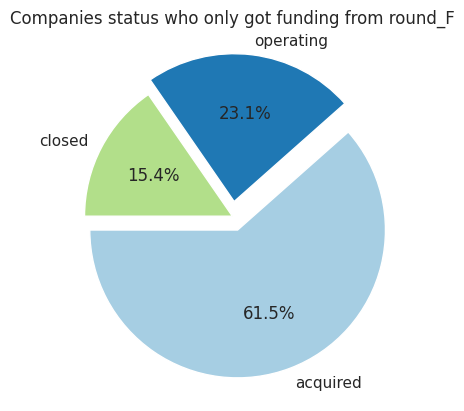

In [ ]:
zrf = data_round_F_only["status"].value_counts()
print(sum(zrf))
plt.pie(zrf,labels=zrf.index,startangle=180,autopct="%1.1f%%",explode = (0.1,0.1,0))
plt.title("Companies status who only got funding from round_F")

- A significant majority (61.5%) of companies that received funding solely from Round F are still operating. This suggests that Round F funding, typically provided to well-established and mature companies, significantly enhances the chances of long-term operational success.

- The acquisition rate for companies funded solely from Round F is notably high at 23.1%. This indicates that Round F funding brings companies closer to a potential exit strategy, making them highly attractive targets for acquisition by larger companies or through mergers.

- The percentage of companies that closed down after receiving only Round F funding (15.4%) is relatively low. This suggests that Round F funding, when managed effectively, can provide a degree of resilience and support for navigating challenges and achieving long-term success.

In [ ]:
data_round_G_only = data[data["funding_total_usd"]==data["round_G"]]

3


Text(0.5, 1.0, 'Companies status who only got funding from round_G')

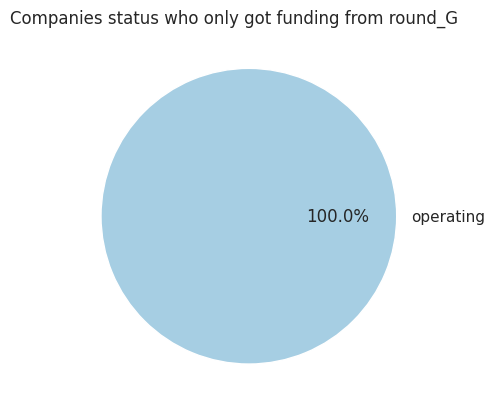

In [ ]:
zrg = data_round_G_only["status"].value_counts()
print(sum(zrg))
plt.pie(zrg,labels=zrg.index,startangle=180,autopct="%1.1f%%",explode = (0.1,))
plt.title("Companies status who only got funding from round_G")

- The most striking observation is that an astonishing 100% of companies that received funding solely from Round G are still operating. This suggests that Round G funding, typically provided to extremely mature and well-established companies, is highly effective in supporting long-term operational success.

- The pie chart reveals that none of the companies in this category have been acquired or closed down. This indicates that companies reaching Round G funding are likely mature and established entities with strong market positions and sustainable business models.

In [ ]:
data_round_H_only = data[data["funding_total_usd"]==data["round_H"]]

In [ ]:
zrh = data_round_H_only["status"].value_counts()
print(sum(zrh))
print("Companies who only got funding from round_H is 0")

0
Companies who only got funding from round_H is 0


Text(0.5, 1.0, 'top 23 Highest funded companies')

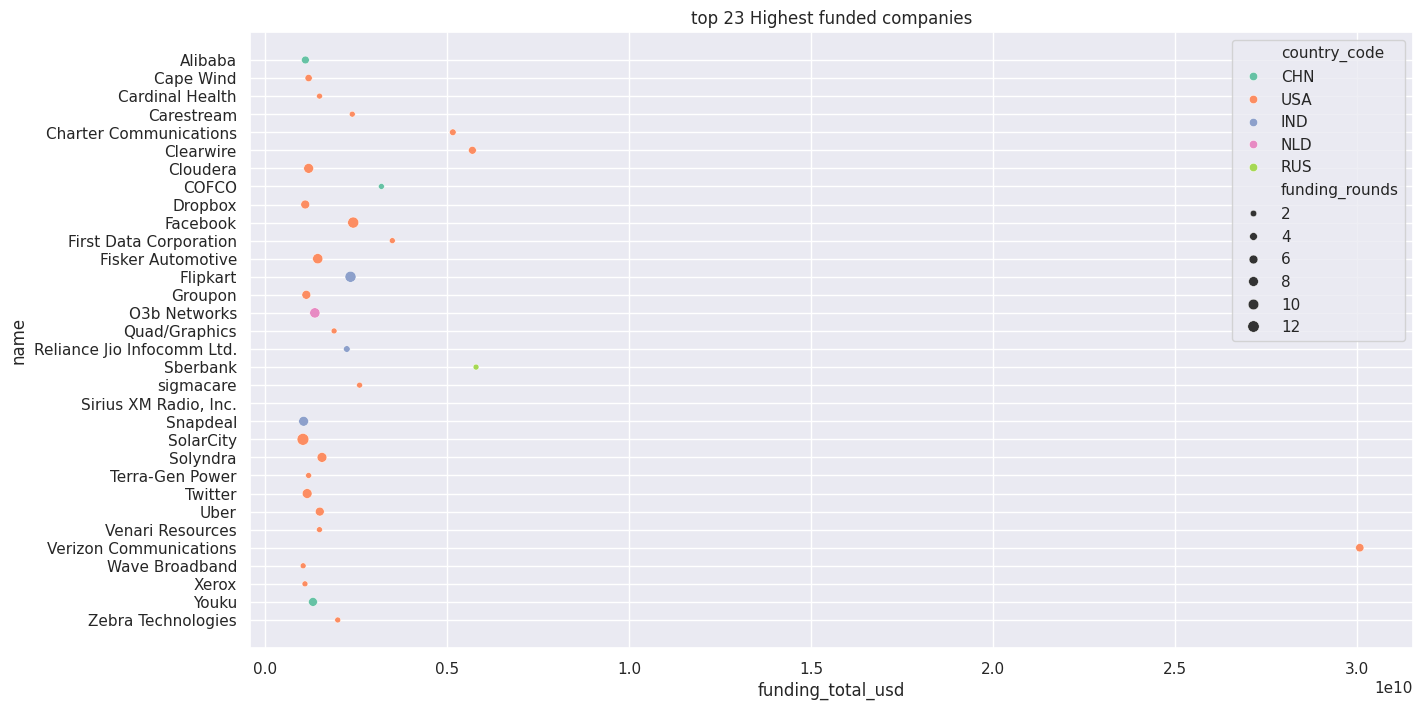

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="name",x="funding_total_usd",data=High_funded,hue="country_code",palette="Set2",size="funding_rounds")
plt.title("top 23 Highest funded companies")

- The scatterplot reveals that a significant number of the top 23 highest-funded companies are concentrated in the range of 0-1 billion USD in funding.
- This suggests that while there are a few companies with exceptionally high funding, a majority of them fall within this range.

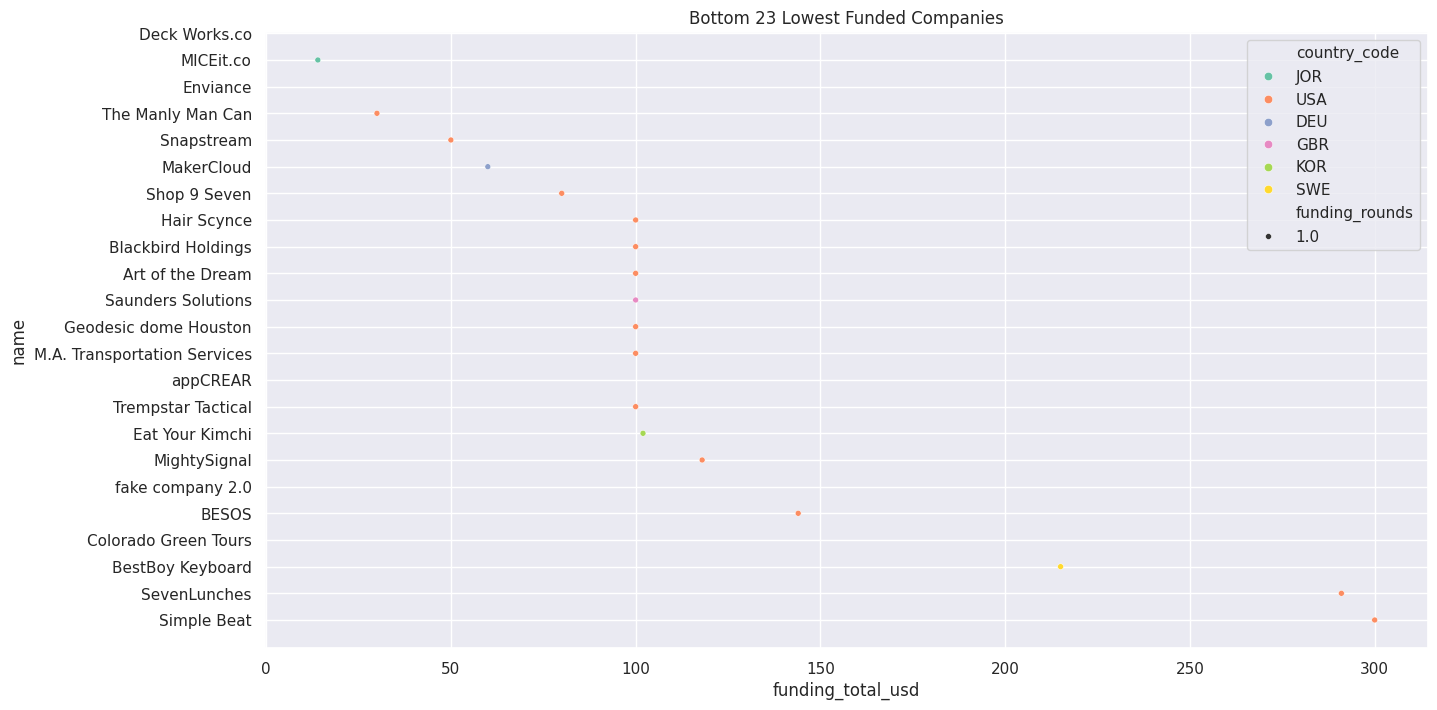

In [ ]:
# Assuming 'Low_funded' is your DataFrame

# Sort the DataFrame by funding_total_usd in ascending order
Low_funded_sorted = Low_funded.sort_values(by='funding_total_usd', ascending=True)

# Select the bottom 22 companies
bottom_23_companies = Low_funded_sorted.head(23)

# Create the scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(y="name", x="funding_total_usd", data=bottom_23_companies,
                hue="country_code", palette="Set2", size="funding_rounds")
plt.title("Bottom 23 Lowest Funded Companies")
plt.show()

- The scatterplot shows that the majority of the bottom 22 lowest-funded companies have received very small amounts of funding, ranging from a few thousand dollars to a few hundred thousand dollars.
- This confirms that these companies operate with limited financial resources.

Text(0.5, 1.0, 'Founded year of top funded companies')

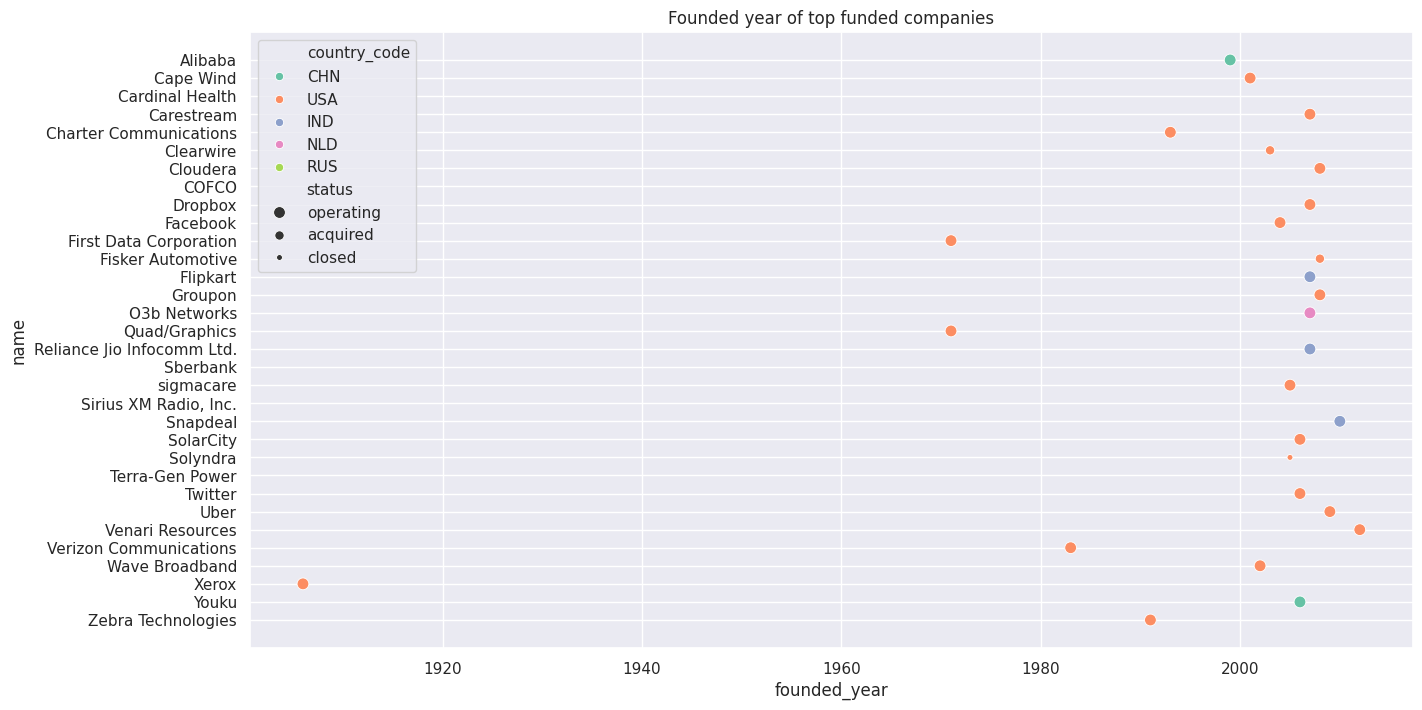

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="name",x="founded_year",data=High_funded,hue="country_code",palette="Set2",size="status")
plt.title("Founded year of top funded companies")

- The scatterplot shows a clear uneven distribution of high-funded companies across different founded years.
- There's a significant increase in the number of high-funded companies from 2000 onwards.

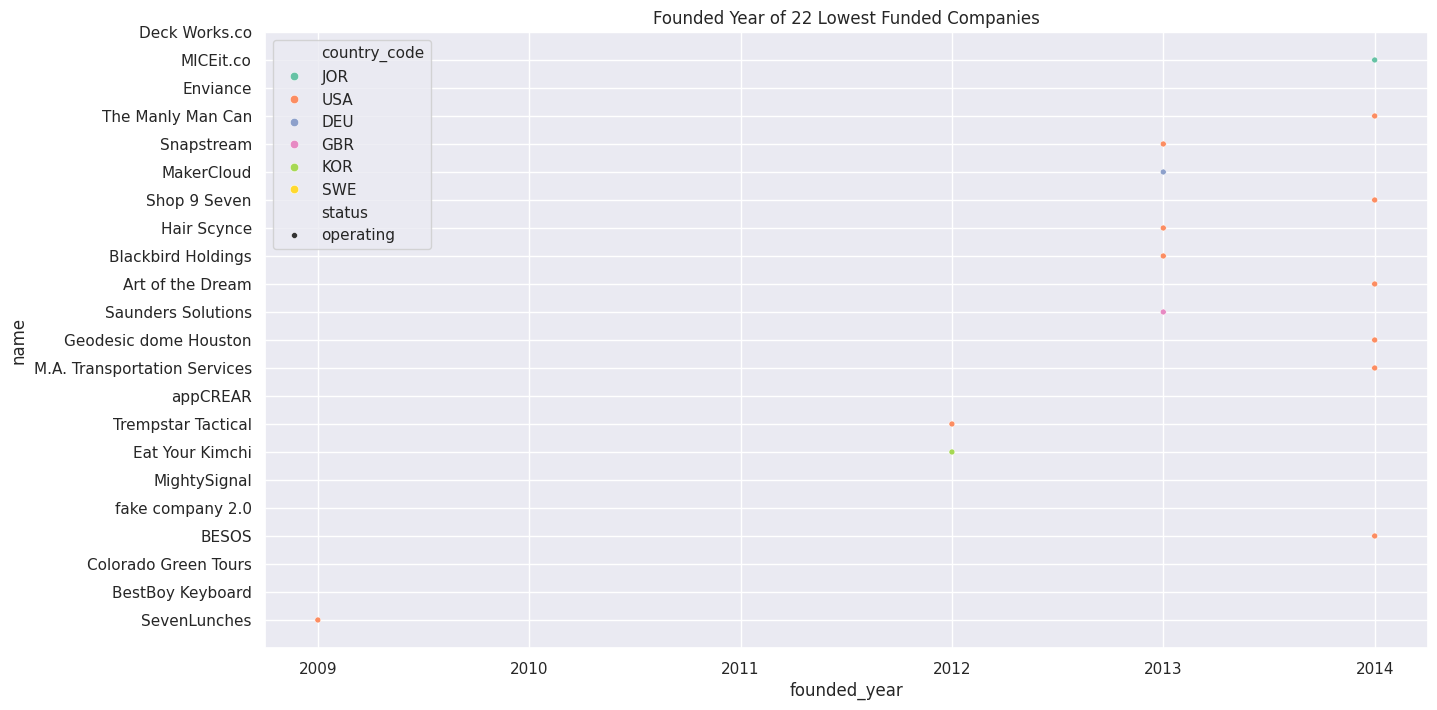

In [ ]:
# Assuming 'Low_funded' is your DataFrame

# Sort the DataFrame by funding_total_usd in ascending order
Low_funded_sorted = Low_funded.sort_values(by='funding_total_usd', ascending=True)

# Select the bottom 22 companies
bottom_22_companies = Low_funded_sorted.head(22)

# Create the scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(y="name", x="founded_year", data=bottom_22_companies,
                hue="country_code", palette="Set2", size="status")
plt.title("Founded Year of 22 Lowest Funded Companies")
plt.show()

- The scatterplot shows a clear uneven distribution of low-funded companies across different founded years.
- There's a significant increase in the number of low-funded companies from 2000 onwards, with a peak around 2012-2014.

<Axes: xlabel='funding_total_usd', ylabel='name'>

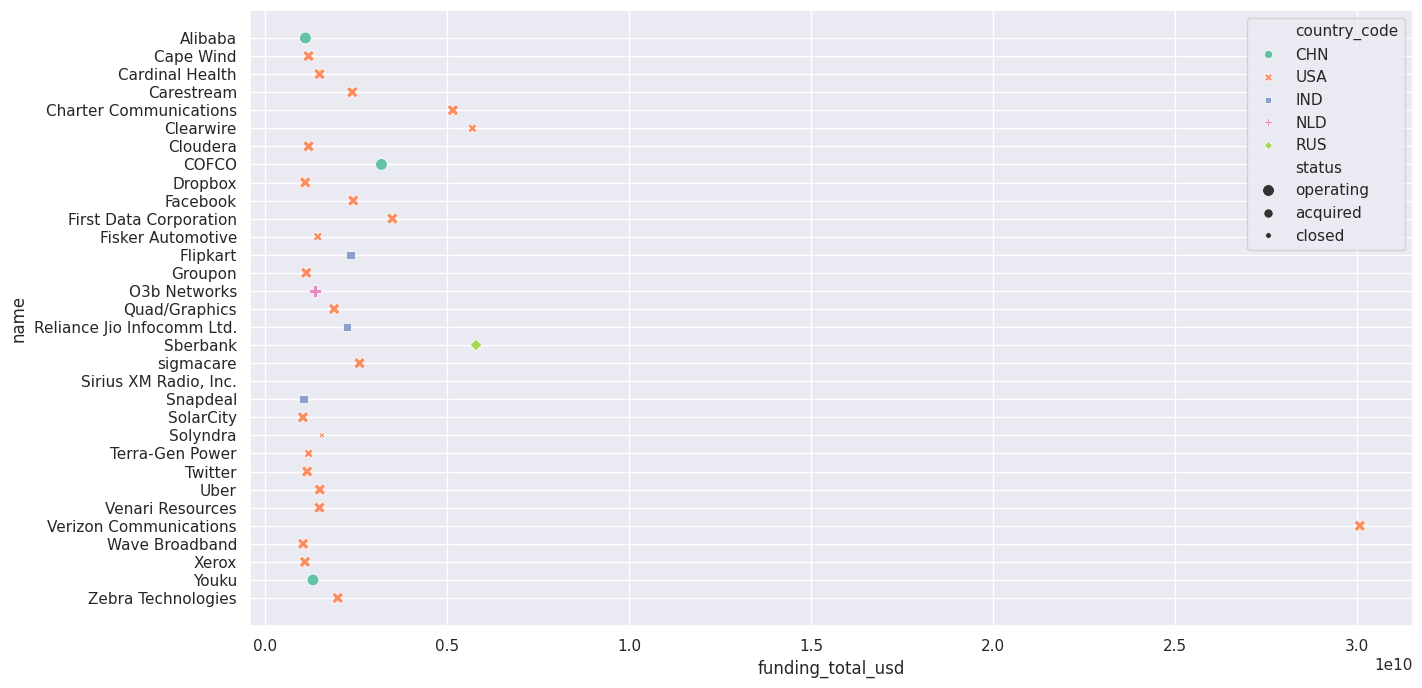

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="name",x="funding_total_usd",data=High_funded,hue="country_code",style="country_code",palette="Set2",size="status")

- The scatterplot shows a clear uneven distribution of high-funded companies across different funding levels.
- A majority of the companies cluster in the lower range of funding, while a few outliers have received significantly higher amounts of funding.

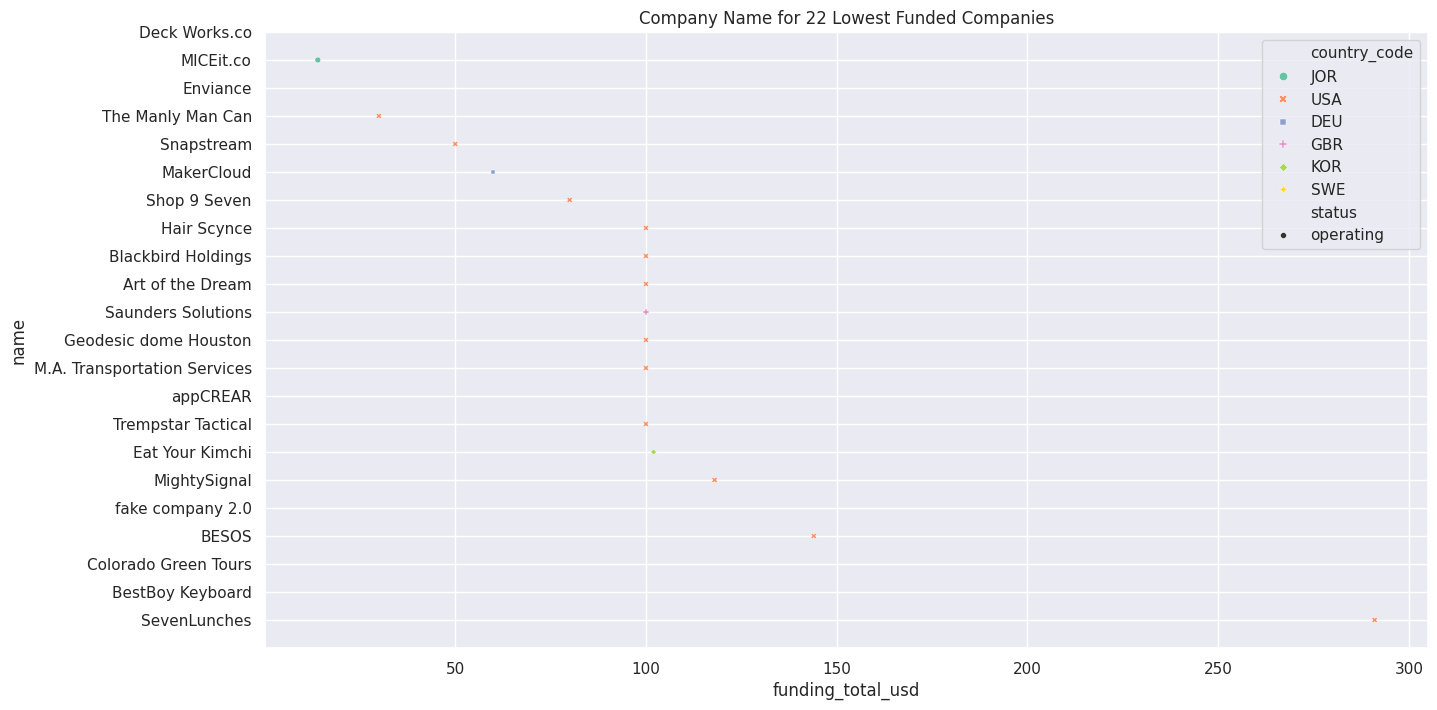

In [ ]:
# Assuming 'Low_funded' is your DataFrame

# Sort the DataFrame by funding_total_usd in ascending order
Low_funded_sorted = Low_funded.sort_values(by='funding_total_usd', ascending=True)

# Select the bottom 22 companies
bottom_22_companies = Low_funded_sorted.head(22)

# Create the scatterplot
plt.figure(figsize=(15, 8))
sns.scatterplot(y="name", x="funding_total_usd", data=bottom_22_companies,
                hue="country_code", style="country_code", palette="Set2", size="status")
plt.title("Company Name for 22 Lowest Funded Companies")
plt.show()

- The scatterplot shows that the majority of the bottom 22 lowest-funded companies have received very small amounts of funding, ranging from a few thousand dollars to a few hundred thousand dollars.
- This confirms that these companies operate with limited financial resources.

Text(0.5, 1.0, 'Funding distributions')

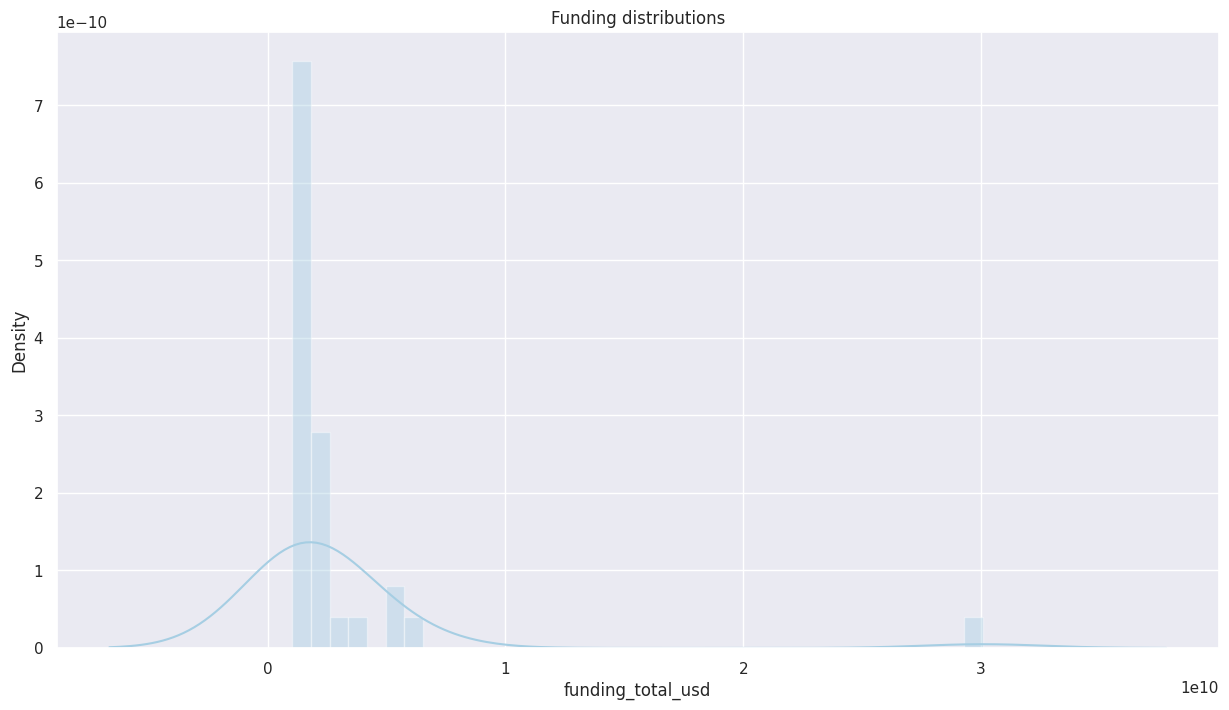

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(High_funded["funding_total_usd"])
plt.title("Funding distributions")



- The histogram reveals a highly skewed distribution of funding_total_usd for the subset of companies with funding exceeding 1 billion USD.
- This indicates that a small number of companies have received significantly larger funding amounts compared to the majority.

Text(0.5, 1.0, 'Funding distributions')

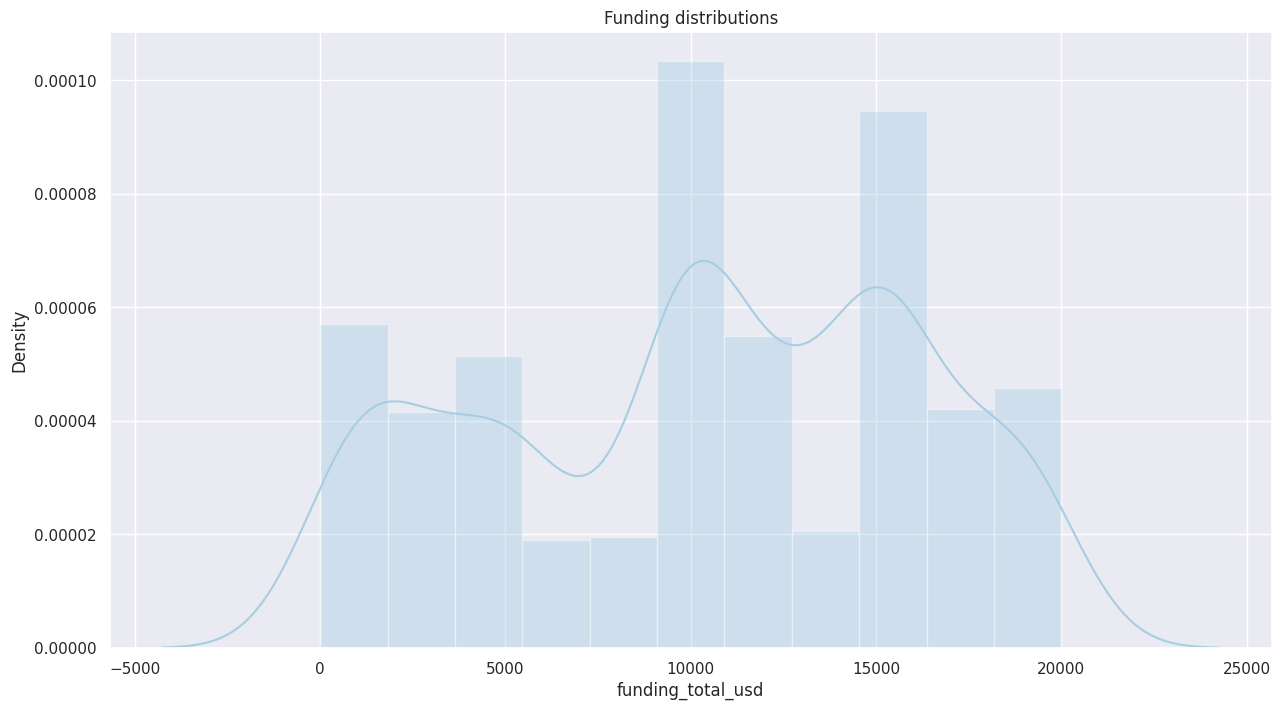

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(Low_funded["funding_total_usd"])
plt.title("Funding distributions")


- The histogram reveals a skewed distribution of funding_total_usd for the subset of companies with funding less than $20,000.
- This indicates that a large number of companies received very little funding, while a smaller number received slightly higher amounts within this range.

In [ ]:
figin = go.Figure()

import plotly.express as px
import plotly.graph_objects as go

figin = go.Figure()
IndianStartup =  data[data["country_code"]=="IND"]
figin.add_trace(go.Scatter(
                x=IndianStartup['name'],
                y=IndianStartup['funding_total_usd'],
                name="",
                line_color='orange'))
figin.update_layout(title_text="funding status in india")
figin.show()

## Insights
### Global and Regional Trends
##### 1. Dominance of the USA:

- The USA leads in startup activity due to:
  - A robust entrepreneurial ecosystem.
  - Vast venture capital availability.
  - Favorable regulations.
- California (SF Bay Area) is the hub, leveraging tech culture and a skilled workforce.
- New York and Texas are emerging as strong players in finance and technology.
  
##### 2. Emerging Economies:

- India and China:
  - Growth fueled by large populations, rising digital economies, and increasing access to funding.
  - Focus on sectors like mobile technology, e-commerce, and clean energy.
- Other regions: Southeast Asia and Africa show growing entrepreneurial interest.

##### 3. Regional Clusters:

- Global hubs: San Francisco, London, and Tel Aviv remain hotspots due to talent pools, innovation hubs, and venture capital availability.
- Emerging regions: Bangalore, Shanghai, and Berlin are increasing in prominence, supported by local initiatives and policies.

### Market and Sector-Specific Insights
##### 1. Tech Dominance:

- Software: The leading category globally, focusing on cloud solutions, AI, and big data.
- Biotechnology: Innovative healthcare solutions drive growth.
- Clean Technology: Reflects a strong focus on sustainability and renewable energy.

##### 2. Diverse Market Presence:

- Growth areas include health tech, e-commerce, and fintech.
- Niche markets (e.g., analytics, wearable tech, and IoT) exhibit disruptive potential.

### Funding Characteristics and Patterns
##### 1. Success in Initial Funding Rounds:

- Most startups secure only one or two funding rounds, highlighting:
  - Heavy reliance on seed and angel investments.
  - Barriers to scaling to later rounds.

##### 2. Disparity in Funding Magnitudes:

- High-funded startups (dollar 1B+):
  - Concentrated in the USA, with notable outliers in China and India.
- Low-funded startups (< dollar 20K):
  - Struggle to sustain operations due to limited resources.

##### 3. Funding Types and Success Rates:

- Seed funding: Highest operational success rates (85-90% of startups still operating).
- Venture funding: Crucial for scaling to regional/global levels.
- Equity crowdfunding and grants: Effective for innovation-driven or mission-focused companies.


## Recommendations
### Strategic Investment Focus
##### 1. Expand Funding Access:

- Early-Stage Support:
  - Establish government/private sector micro-grant programs to lower entry barriers.
  - Encourage angel networks and seed accelerators for underserved regions and industries.
- Support Underfunded Regions and Markets:
  - Allocate resources to underserved regions (e.g., Africa, Southeast Asia).
  - Prioritize niche markets with innovation potential (e.g., clean technology, biotech).

##### 2. Support for Growth Sectors:

- Foster innovation in software, mobile, and biotech with R&D grants and tax incentives.
- Encourage startups in sustainability-focused sectors like clean energy with green bonds and access to clean-tech incubators.

##### 3. Data-Driven Investments:

- Use data analytics to identify trends and prioritize high-growth regions/industries.
- Employ AI tools to assess high-potential startups.

### Enhancing Ecosystem Development
##### 1. Strengthen Local and Regional Collaboration:

- Create networks between startups, universities, and research centers.
- Facilitate cross-border knowledge sharing and venture co-investments.

##### 2. Tailored Ecosystem Policies:

- For emerging economies:
  - Simplify business registration.
  - Provide startup-focused infrastructure (e.g., co-working spaces).
- For established hubs:
  - Support scaling startups with R&D grants and global market-entry assistance.

##### 3. Mentorship and Training:

- Offer mentorship programs connecting experienced entrepreneurs with startups.
- Provide industry-specific technical training and leadership development.

### Funding Structure Optimization
##### 1. Diversify Funding Sources:

- Combine equity financing, debt financing, and crowdfunding to build financial resilience.
- Promote revenue-based financing for startups hesitant to dilute ownership.

##### 2. Maximize Resource Utilization:

- For low-funded startups:
  - Focus on lean operations to extend runway.
  - Leverage cost-effective solutions like remote work and digital tools.
- For high-funded startups:
  - Prioritize investments in R&D, talent acquisition, and global expansion.

##### 3. Milestone-Based Funding:

- Tie funding disbursements to performance metrics, market validation, or product milestones.

### Scaling and Sustaining Success
##### 1. Sustaining Growth in High-Funded Companies:

- Encourage continuous innovation to maintain competitive advantage.
- Strengthen corporate governance for efficient funding utilization.

##### 2. Support for Low-Funded Companies:

- Develop partnerships for micro-loans and bootstrapping resources.
- Promote customer-funded models for startups with limited capital.

##### 3. Monitor and Address Challenges:

- Analyze economic factors like inflation or recession affecting funding.
- Develop contingency strategies for startups during downturns (e.g., pivoting or downsizing).

### Policy Interventions
##### 1. Streamline Regulatory Frameworks:

- Simplify administrative processes for startups.
- Strengthen intellectual property (IP) protection laws to encourage innovation.

##### 2. Create Sector-Specific Policies:

- Provide grants for clean-tech innovations or healthcare startups addressing global challenges (e.g., climate change, pandemics).

##### 3. Foster Inclusivity:

- Promote diversity by supporting startups led by underrepresented groups.
- Develop programs targeting rural and economically disadvantaged regions.

### Investment Strategies
##### 1. Identify High-Growth Startups:

- Use AI and analytics to assess success probabilities based on:
  - Team composition.
  - Market readiness.
  - Technology maturity.

##### 2. Encourage Long-Term Investments:

- Build sustainable business models instead of focusing on short-term exits.
- Promote patient capital approaches for venture and angel investments.

##### 3. Leverage Historical Data:

- Use past trends to identify high-ROI sectors, regions, and startup profiles.
- Invest in emerging trends like blockchain, Web3, and quantum computing.
